# Pré-processamento dos dados

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

In [3]:
market = pd.read_csv('data/raw/estaticos_market.csv', index_col=0, parse_dates = ['dt_situacao'])
market.dropna(axis=1, how='all', inplace=True)
market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462298 entries, 0 to 462297
Columns: 176 entries, id to qt_filiais
dtypes: bool(9), datetime64[ns](1), float64(139), int64(1), object(26)
memory usage: 596.5+ MB


## Missing

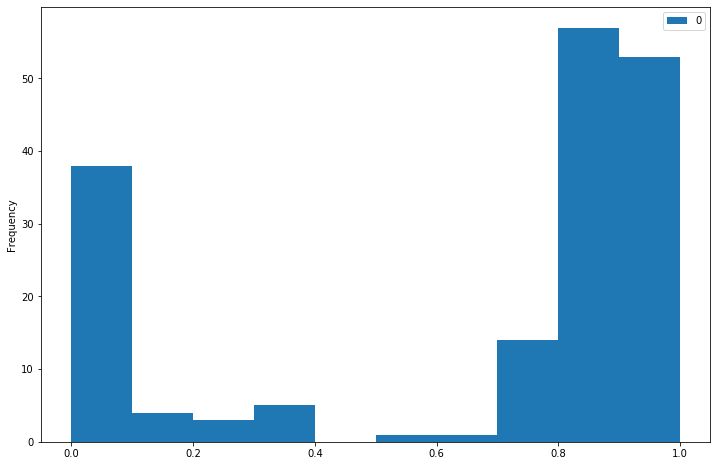

In [4]:
pd.DataFrame(market.isna().sum()/len(market)).plot(kind='hist');

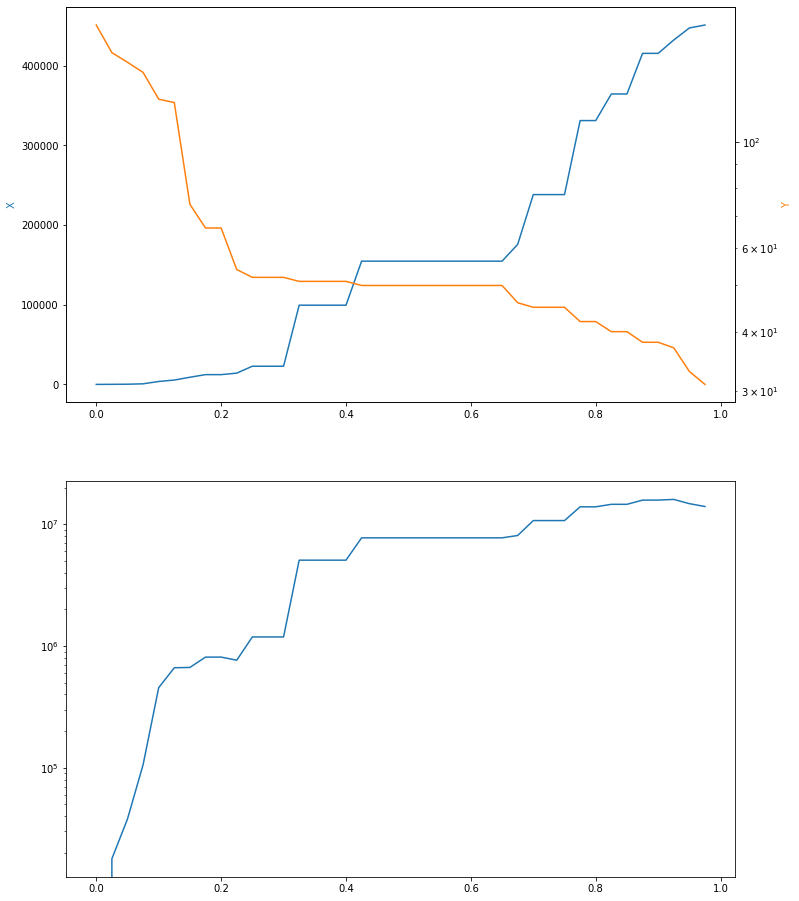

In [5]:
X = []
Y = []
S = []

for number in np.arange(0.00, 1.00, 0.025):
    temp = (market.dropna(axis=1, thresh=len(market)*number)).dropna(axis=0, how='any').shape
    X.append(temp[0])
    Y.append(temp[1])
    S.append((market.dropna(axis=1, thresh=len(market)*number)).dropna(axis=0, how='any').count().sum())

fig, [ax1, bx] = plt.subplots(2, figsize=(12,16))
ax1.plot(np.arange(0.00, 1.00, 0.025), X, color='tab:blue')
ax1.set_ylabel('X', color='tab:blue')
plt.yscale('log')
ax2 = ax1.twinx()
ax2.plot(np.arange(0.00, 1.00, 0.025), Y, color='tab:orange')
ax2.set_ylabel('Y', color='tab:orange')
plt.yscale('log')
bx.plot(np.arange(0.00, 1.00, 0.025), S)
plt.yscale('log');

del X, Y, number, S, temp, ax1, ax2, fig, bx

### Base reduzida para baseline:

Sem nenhuma inputação e maximizando o número de dados que ficam no dataset, faz-se drop de colunas com valores faltantes e em seguida de linhas com algum valor nulo.

In [6]:
market_dropped_na = market.dropna(axis=1, thresh=len(market)*.925)
market_dropped_na.dropna(axis=0, how='any', inplace=True)

### Inputação de Dados

Conforme análise semântica de grupos de features e algumas colunas de forma individual, faz-se inputação de valores e drop de algumas features

In [24]:
market[market.filter(regex='^qt_').columns] = market.filter(regex='^qt_').fillna(0)
#qt_ relaciona-se a quantidade de coisas, se eu não sei quanto tem, assumo que tenha 0

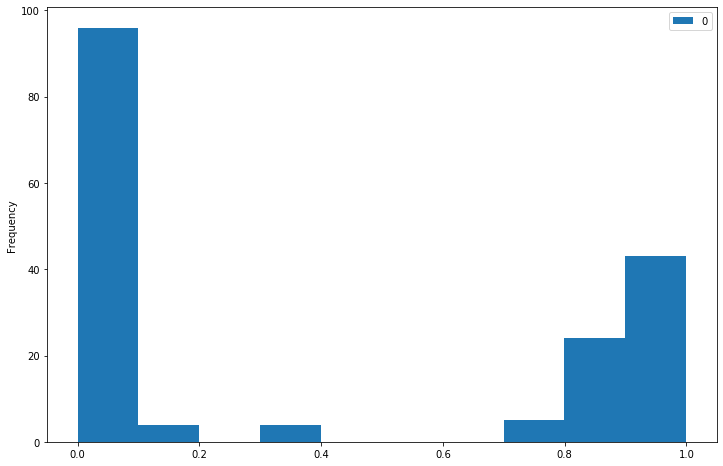

In [26]:
pd.DataFrame(market.isna().sum()/len(market)).plot(kind='hist');

In [31]:
market[market.filter(regex='faturamento_est_').columns] = market.filter(regex='faturamento_est_').fillna(0)
#mesma lógica do qt_, se não sei o faturamento, o assumo nulo

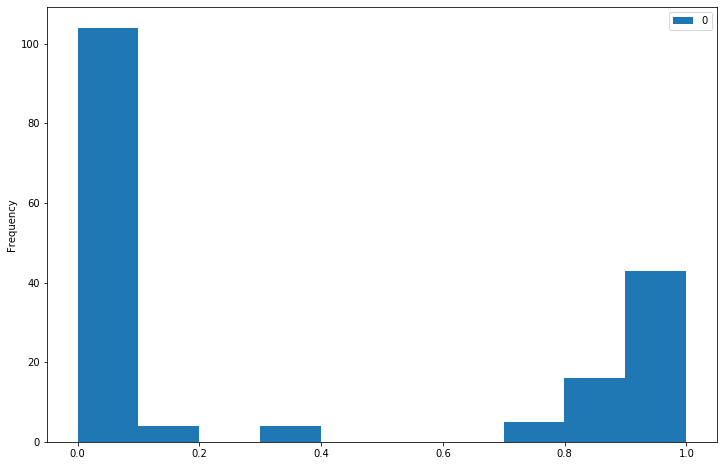

In [32]:
pd.DataFrame(market.isna().sum()/len(market)).plot(kind='hist');

In [47]:
market[market.filter(regex='percent_func_genero').columns] = market.filter(regex='percent_func_genero').fillna(0)

market.sum_faturamento_estimado_coligadas = market.sum_faturamento_estimado_coligadas.fillna(-1)

market[market.filter(regex='vl_total').columns] = market.filter(regex='vl_total').fillna(0)

market.vl_potenc_cons_oleo_gas = market.vl_potenc_cons_oleo_gas.fillna(0)

market.vl_frota = market.vl_frota.fillna(0)

market[market.filter(regex='vl_folha').columns] = market.filter(regex='vl_folha').fillna(-1)

market[market.filter(regex='vl_fat').columns] = market.filter(regex='vl_fat').fillna(-1)

market.total = market.total.fillna(0)

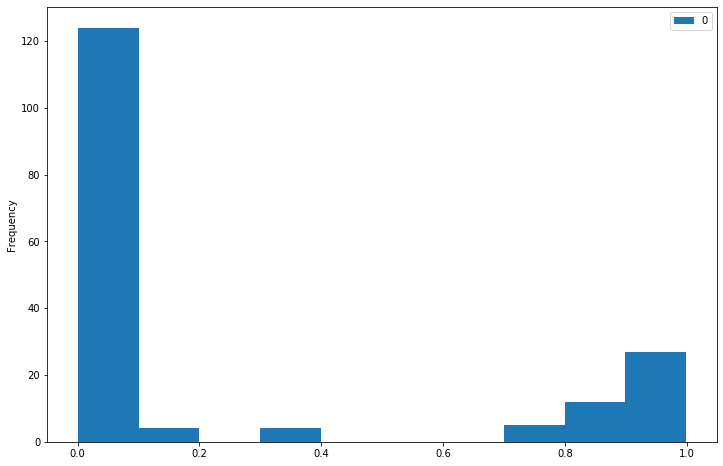

In [48]:
pd.DataFrame(market.isna().sum()/len(market)).plot(kind='hist');

In [49]:
market.dropna(thresh=len(market)*0.2, axis=1, inplace=True)

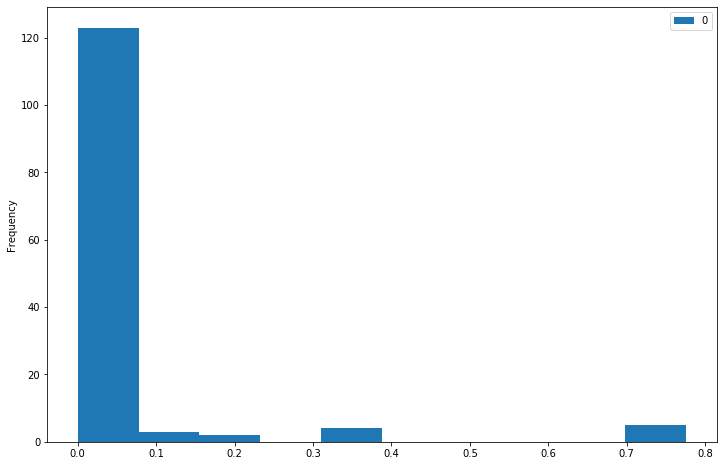

In [50]:
pd.DataFrame(market.isna().sum()/len(market)).plot(kind='hist');

In [63]:
market.columns.difference((market.dropna(thresh=len(market)*0.3, axis=1).columns)).tolist()

['max_meses_servicos_all',
 'media_meses_servicos_all',
 'meses_ultima_contratacaco',
 'min_meses_servicos_all',
 'tx_rotatividade']

In [65]:
market.dropna(thresh=len(market)*0.3, axis=1, inplace=True)

In [91]:
market[market.filter(regex='^idade_m').columns] = market.filter(regex='^idade_m').fillna(-1)

market.empsetorcensitariofaixarendapopulacao = market.empsetorcensitariofaixarendapopulacao.fillna(-1)

market[market.filter(regex='fl_opt').columns] = market.filter(regex='fl_opt').fillna(-1)

market.de_saude_tributaria = market.de_saude_tributaria.fillna('CINZA')

market.de_nivel_atividade = market.de_nivel_atividade.fillna('MUITO BAIXA')

In [83]:
market.filter(regex='fl_opt').columns

Index(['fl_optante_simples', 'fl_optante_simei'], dtype='object')

In [95]:
to_drop = ['de_faixa_faturamento_estimado_grupo', 'de_faixa_faturamento_estimado', 'de_saude_rescencia']

market.drop(columns=to_drop, axis=1, inplace=True)

In [104]:
market.sg_uf_matriz = market.sg_uf_matriz.fillna(market.sg_uf*market.fl_matriz)


In [186]:
market.loc[market.sg_uf_matriz.isna()][['sg_uf', 'fl_matriz']]
market.sg_uf_matriz.replace('', "NA", inplace=True)


In [136]:
market[market.filter(regex='nm_m').columns] = market.filter(regex='nm_m').fillna(-1)

market[market.filter(regex='nm_').columns] = market.filter(regex='nm_').fillna('OUTROS')

market[market.filter(regex='fl_').columns] = market.filter(regex='fl_').fillna(False)

market.nu_meses_rescencia = market.nu_meses_rescencia.fillna(-1)

market.setor = market.setor.fillna('OUTROS')

market.dt_situacao = market.dt_situacao.fillna(pd.datetime(market.dt_situacao.mode(),1,1).year)

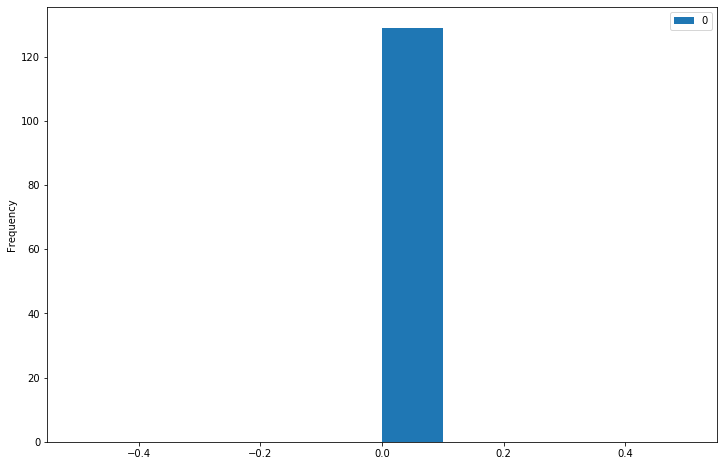

In [154]:
pd.DataFrame(market.isna().sum()/len(market)).plot(kind='hist');

In [152]:
market.to_csv('data/cooked/market_inputed.csv', index=False)

In [155]:
market_dropped_na.to_csv('data/cooked/market_no_input.csv', index=False)

In [262]:
market = pd.read_csv('data/cooked/market_inputed.csv')

## Codificação de features categóricas


In [263]:
for column in market.drop(columns=['id']).select_dtypes('O').columns:
    print (column, len(market[column].unique()))

de_natureza_juridica 67
sg_uf 6
natureza_juridica_macro 7
de_ramo 33
setor 6
idade_emp_cat 6
fl_rm 2
nm_divisao 88
nm_segmento 22
fl_optante_simples 3
fl_optante_simei 3
sg_uf_matriz 28
de_saude_tributaria 6
de_nivel_atividade 4
nm_meso_regiao 20
nm_micro_regiao 74


In [264]:
to_drop = ['de_natureza_juridica', 'nm_divisao', 'nm_micro_regiao', 'de_ramo', 'nm_segmento', 'nm_meso_regiao']
market.drop(columns=to_drop, inplace=True)

In [265]:
for column in market.drop(columns=['id']).select_dtypes('O').columns:
    print (column, '\n', market[column].value_counts())

sg_uf 
 MA    127654
RN     98837
AM     82114
PI     76686
RO     56469
AC     20538
Name: sg_uf, dtype: int64
natureza_juridica_macro 
 OUTROS                            320211
ENTIDADES EMPRESARIAIS             99241
ENTIDADES SEM FINS LUCRATIVOS      37089
ADMINISTRACAO PUBLICA               2912
CARGO POLITICO                      1617
PESSOAS FISICAS                     1225
INSTITUICOES EXTRATERRITORIAIS         3
Name: natureza_juridica_macro, dtype: int64
setor 
 COMERCIO            211224
SERVIÇO             189644
INDUSTRIA            30893
CONSTRUÇÃO CIVIL     25363
AGROPECUARIA          3247
OUTROS                1927
Name: setor, dtype: int64
idade_emp_cat 
 1 a 5      138580
5 a 10     116100
> 20        75572
10 a 15     49205
<= 1        46794
15 a 20     36047
Name: idade_emp_cat, dtype: int64
fl_rm 
 NAO    236779
SIM    225519
Name: fl_rm, dtype: int64
fl_optante_simples 
 True     199617
False    179968
-1        82713
Name: fl_optante_simples, dtype: int64
fl_opta

In [266]:
market.fl_rm.replace({'SIM':True, 'NAO':False}, inplace=True)

market.sg_uf_matriz.replace({'-1':'NA'}, inplace=True)

market.drop(columns=['idade_emp_cat'], inplace=True)

In [267]:
one_hot = ['sg_uf', 'natureza_juridica_macro', 'setor', 'fl_optante_simples', 'fl_optante_simei']

label_enc = ['sg_uf_matriz']

market.de_saude_tributaria.replace({'VERDE':0, 'AZUL':1, 'AMARELO':2, 'LARANJA':3, 'VERMELHO':4, 'CINZA':-1}, inplace=True)

market.de_nivel_atividade.replace({'MUITO BAIXA':0, 'BAIXA':1, 'MEDIA':2, 'ALTA':3}, inplace=True)


In [178]:
from sklearn.preprocessing import LabelEncoder

In [268]:
encoder = LabelEncoder()

for feature in label_enc:
    market[feature] = encoder.fit_transform(market[feature])
    print(feature, ':', encoder.classes_)

sg_uf_matriz : ['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'NA'
 'PA' 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']


In [269]:
num_features = market.select_dtypes('number').columns.to_list()

In [270]:
to_drop = ['qt_coligados_atividade_alto', 'qt_coligados_atividade_medio', 'qt_coligados_atividade_baixo', 'qt_coligados_atividade_mt_baixo', 'qt_coligados_atividade_inativo', 'qt_coligados_nula']
market.drop(columns=to_drop, inplace=True)
for feature in to_drop:
    num_features.remove(feature)

In [199]:
from sklearn.preprocessing import StandardScaler

In [274]:
scaler = StandardScaler()

scaler.fit_transform(market.select_dtypes('number'))

print(scaler.scale_, scaler.mean_, scaler.var_)

[9.61565385e+00 5.03710954e+00 2.14649275e+00 1.51787028e-01
 2.52861602e+00 1.72264046e+00 3.11446178e+00 7.24491749e+01
 1.20418202e+03 4.29846707e+01 9.07733069e-01 6.86095531e+00
 7.39221829e+00 1.24286510e+00 1.20115124e+01 7.89576496e-01
 1.99160223e+05 1.13895631e+03 2.91239657e+00 2.89484114e+00
 1.69349486e-01 2.30276548e+01 2.41570877e+01 2.23749293e+01
 2.20361869e+00 8.97984627e-02 1.96794531e+00 6.96669168e-01
 1.91227721e+00 1.65886072e-01 8.44851660e-03 1.23920612e-02
 7.20501917e-03 1.77088860e-02 9.34511595e+00 2.46135659e+01
 9.32612793e+00 9.49575551e+00 4.45582732e-02 1.20516935e-01
 7.78224423e-03 1.83891304e+00 1.27577145e-01 6.55307801e-02
 2.58327051e-01 1.93430464e-02 1.25869057e+00 4.88894845e-01
 2.81727794e+00 7.91409459e-01 8.00555858e+00 6.25661869e-02
 7.30843156e-01 4.90265567e-01 1.95889125e+00 1.85339557e+00
 3.06291696e-01 2.10599806e+00 4.31738526e+00 6.71450812e+00
 4.60612661e+02 8.42320934e+03 6.97018708e+07 9.49558316e+06
 3.69298351e+07 7.950250

In [277]:
market = pd.get_dummies(market, prefix=one_hot, columns=one_hot)

In [287]:
market[market.select_dtypes('bool').columns] = market.select_dtypes('bool').replace({True:1, False:0})

In [288]:
market.to_csv('data\cooked\market_inputed_numeric.csv', index=False)

## Feature Selection


In [2]:
market = pd.read_csv('data\cooked\market_inputed_numeric.csv')


fl_matriz


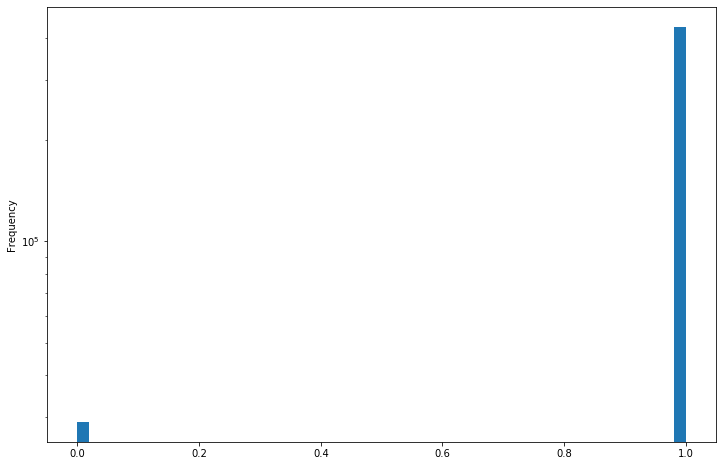

idade_empresa_anos


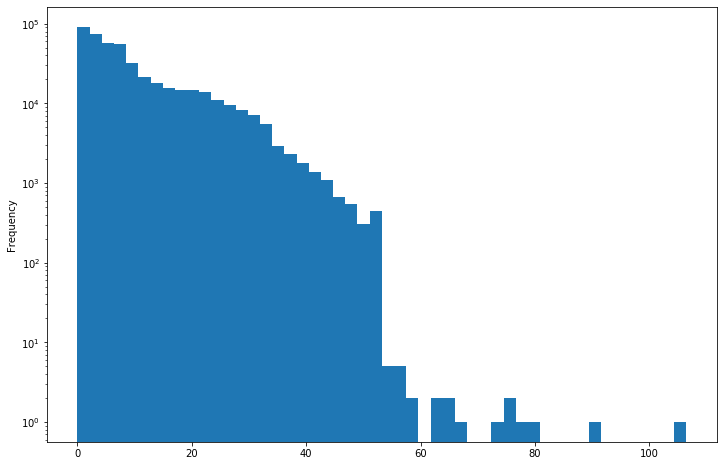

fl_me


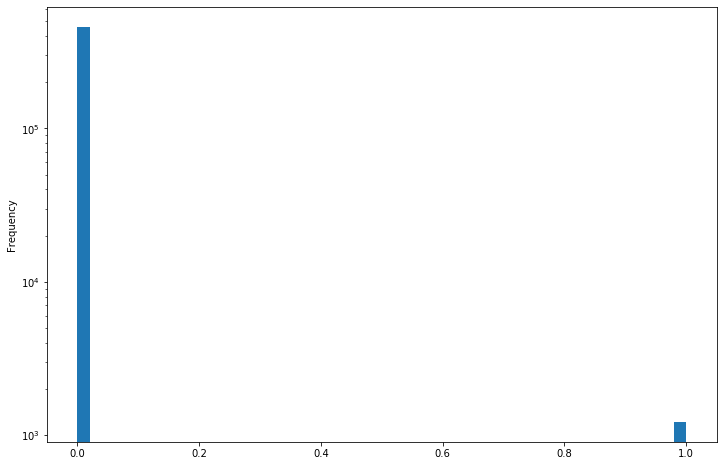

fl_sa


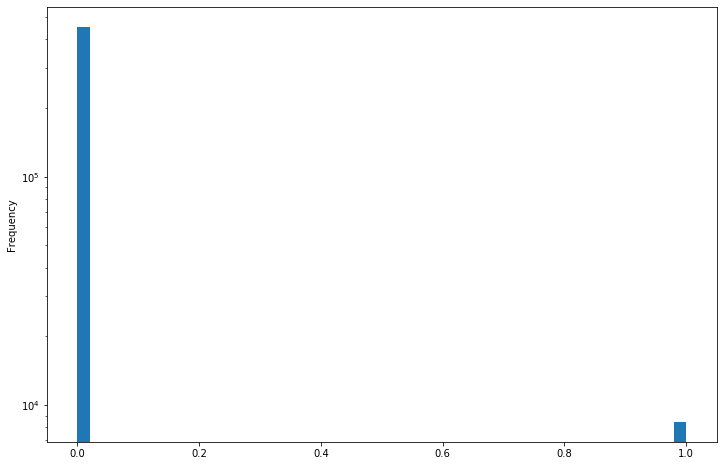

fl_epp


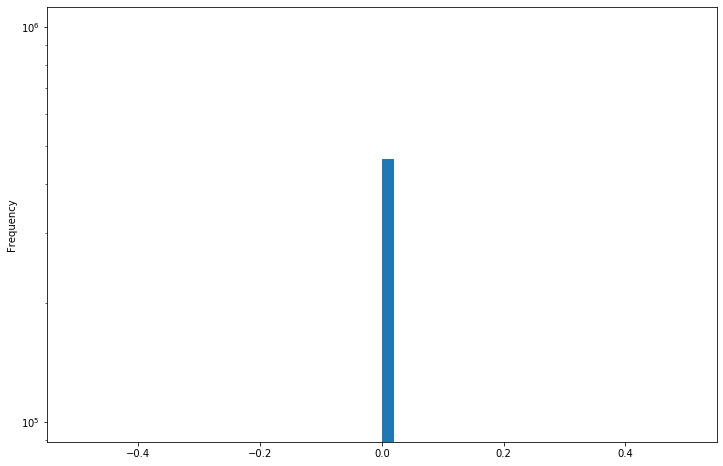

fl_mei


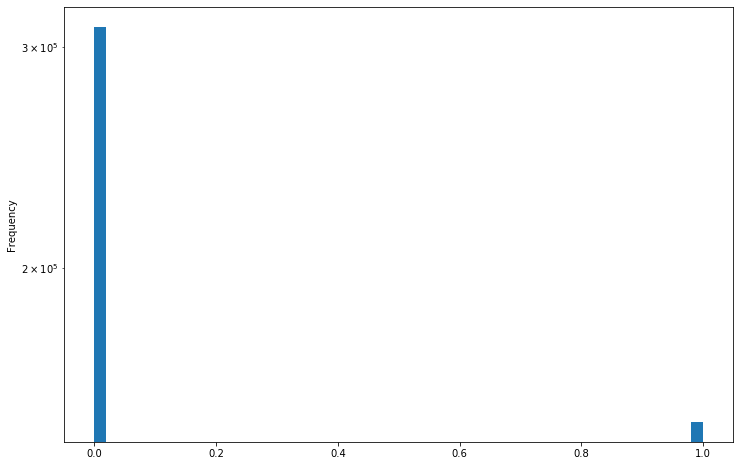

fl_ltda


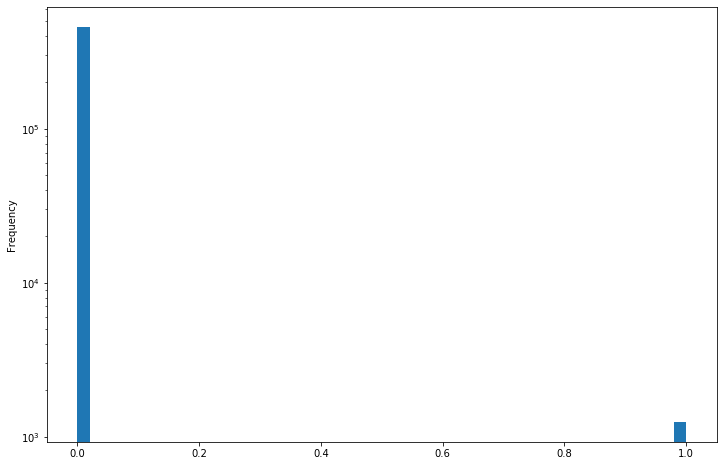

dt_situacao


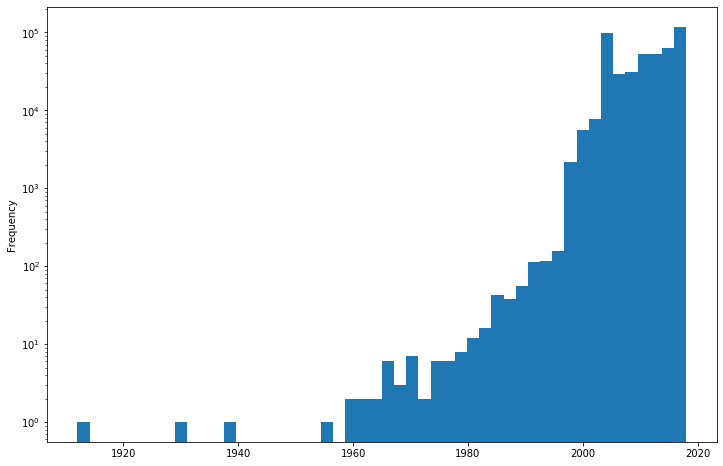

fl_st_especial


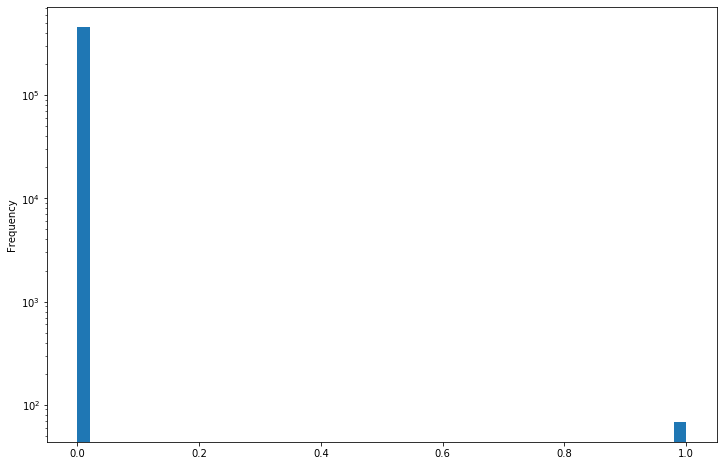

fl_email


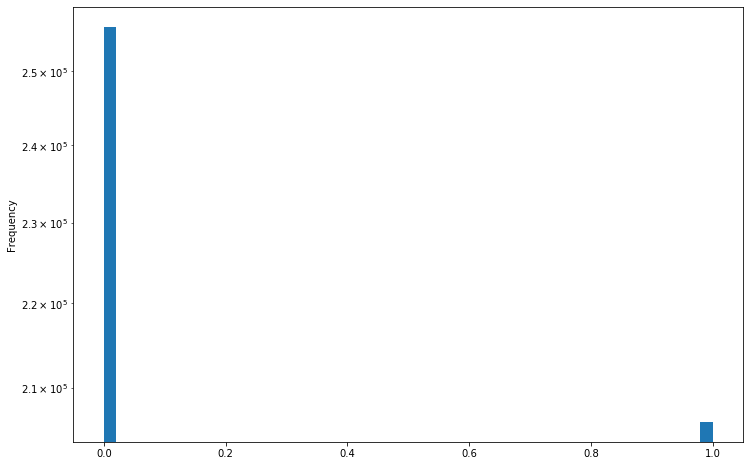

fl_telefone


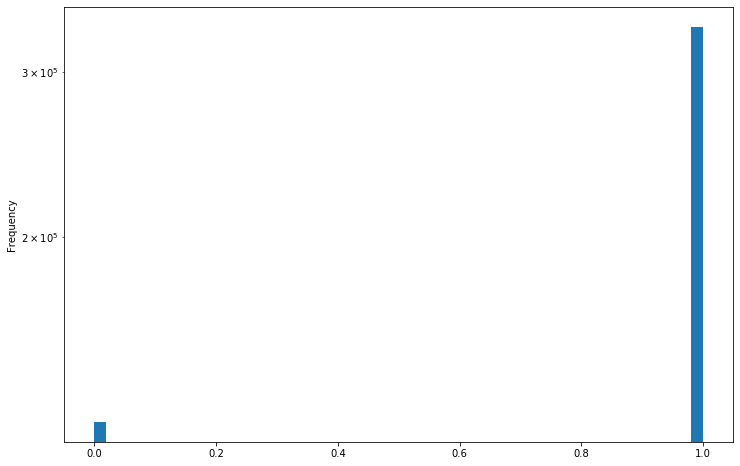

fl_rm


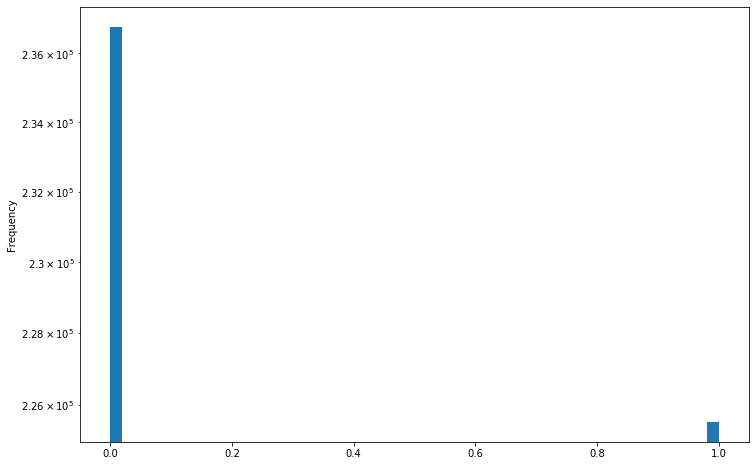

fl_spa


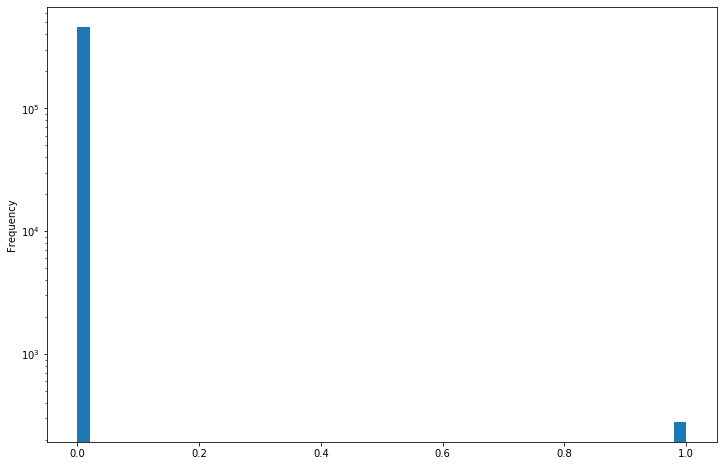

fl_antt


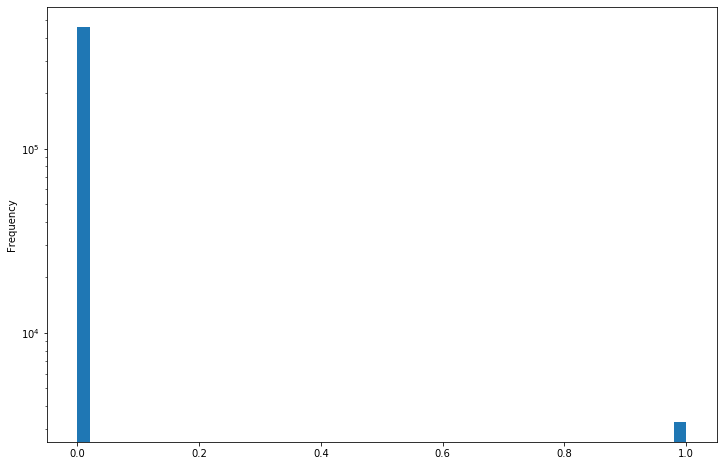

fl_veiculo


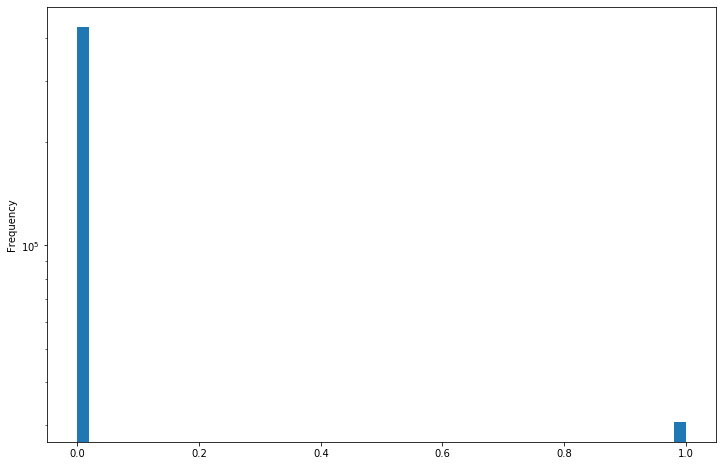

vl_total_tancagem


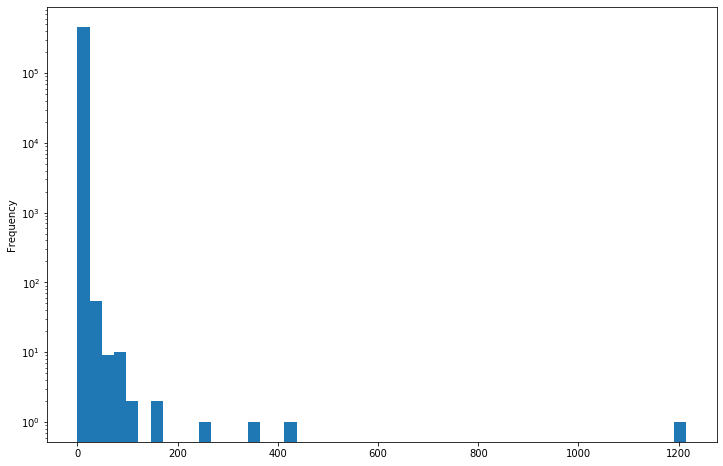

vl_total_veiculos_antt


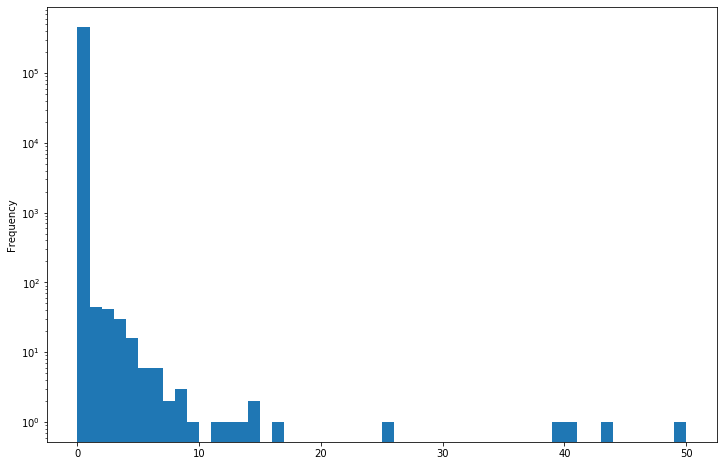

vl_total_veiculos_leves


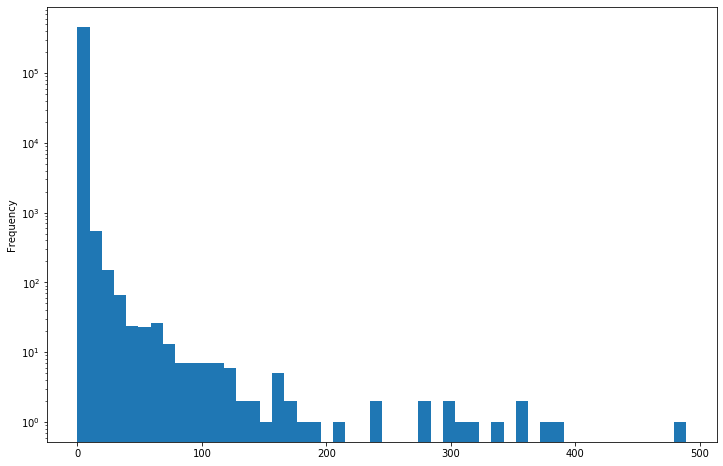

vl_total_veiculos_pesados


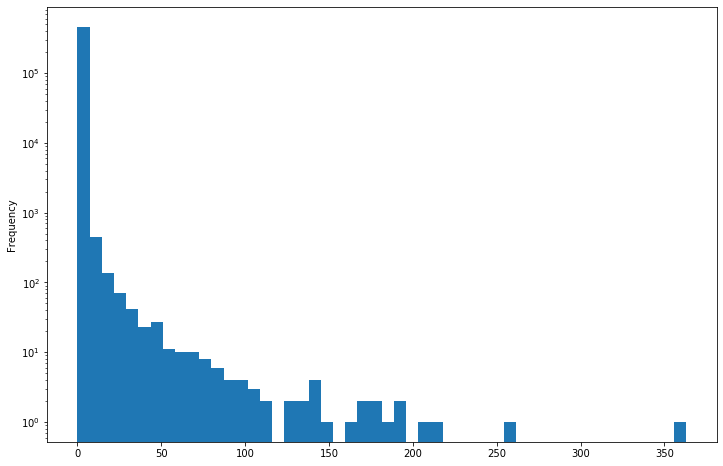

qt_art


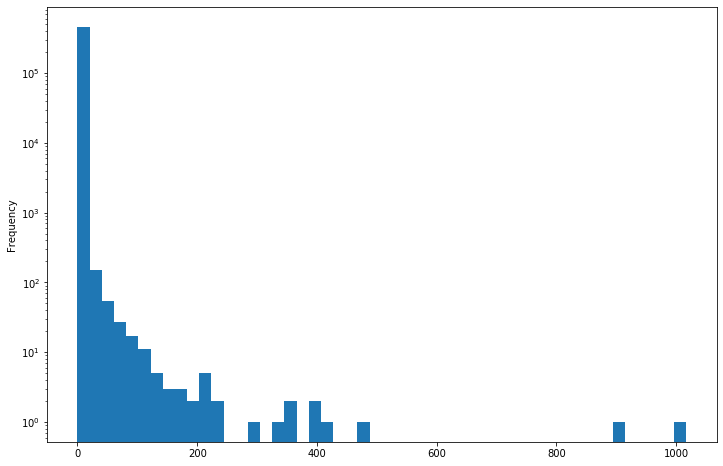

vl_total_veiculos_pesados_grupo


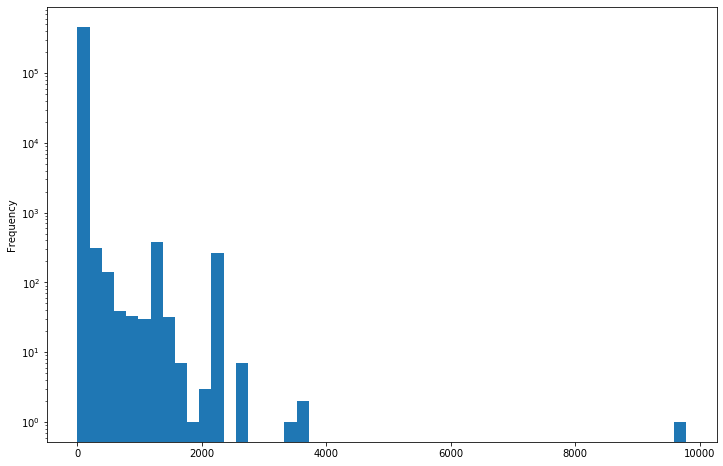

vl_total_veiculos_leves_grupo


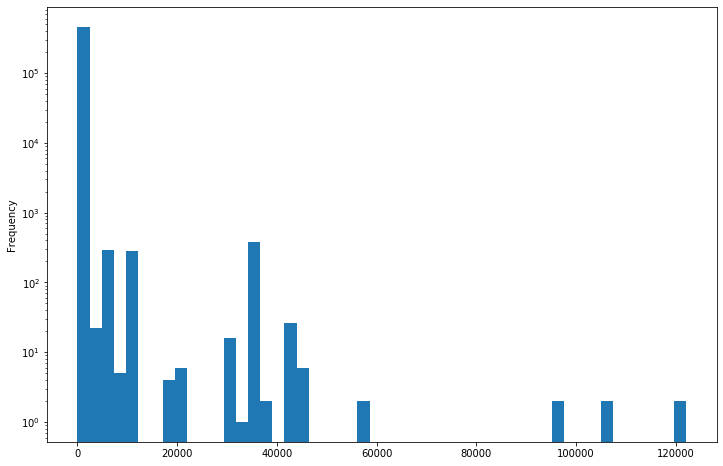

vl_total_tancagem_grupo


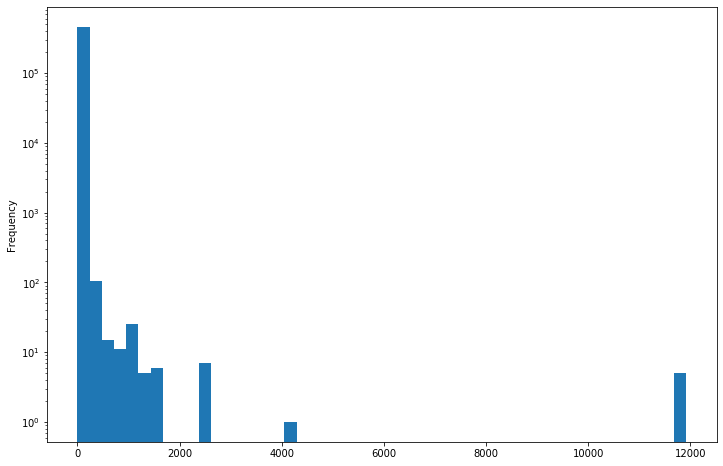

vl_total_veiculos_antt_grupo


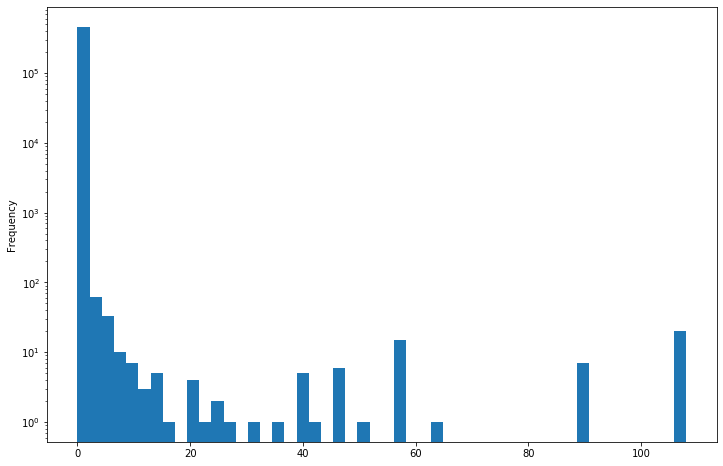

vl_potenc_cons_oleo_gas


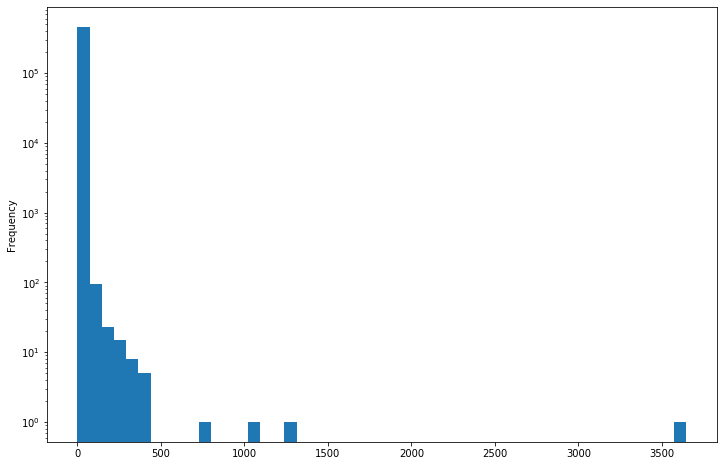

sg_uf_matriz


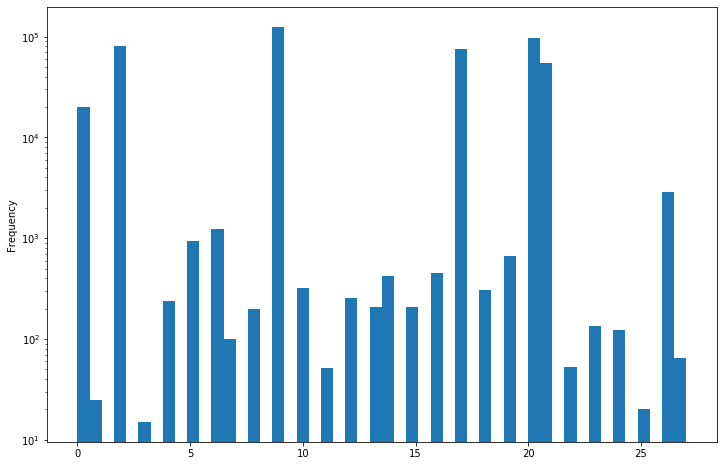

de_saude_tributaria


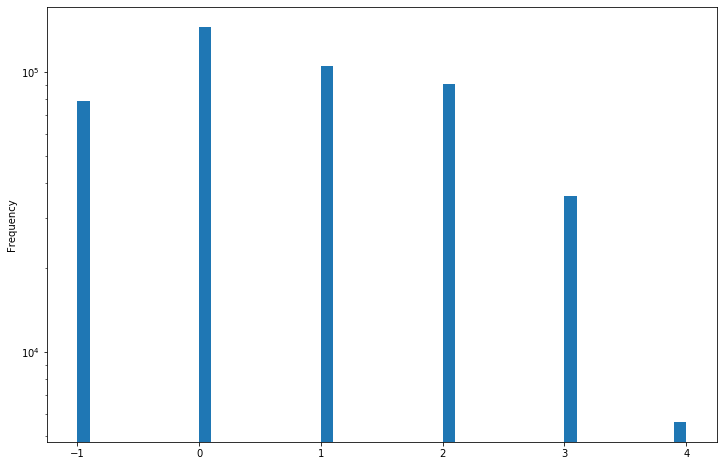

nu_meses_rescencia


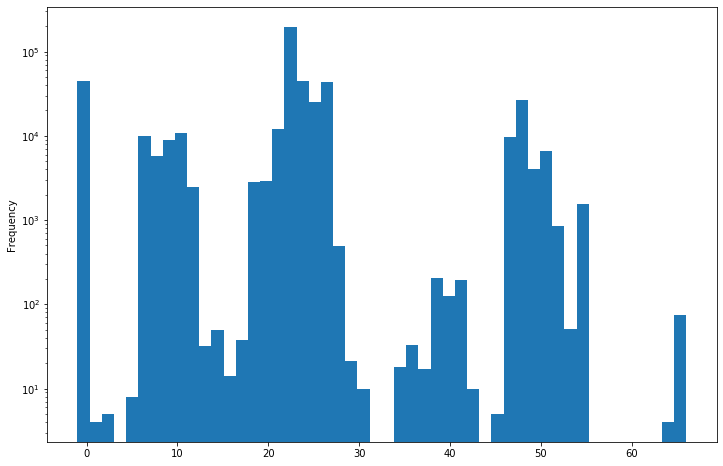

de_nivel_atividade


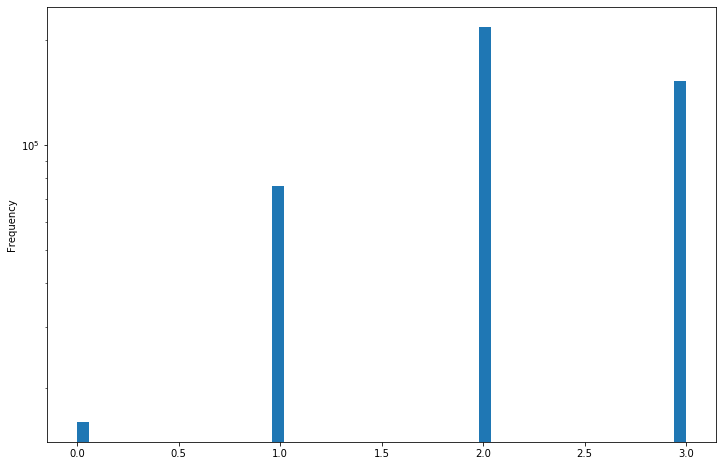

fl_simples_irregular


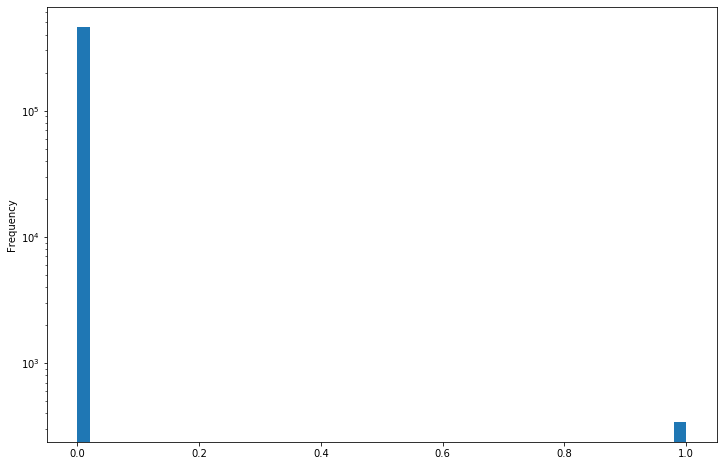

vl_frota


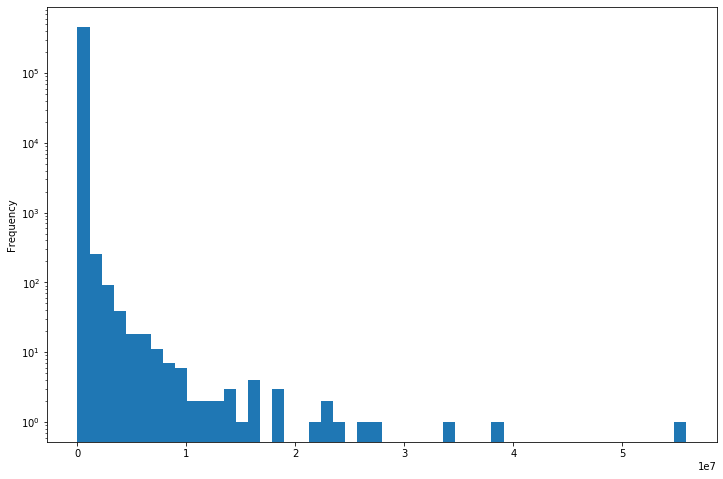

empsetorcensitariofaixarendapopulacao


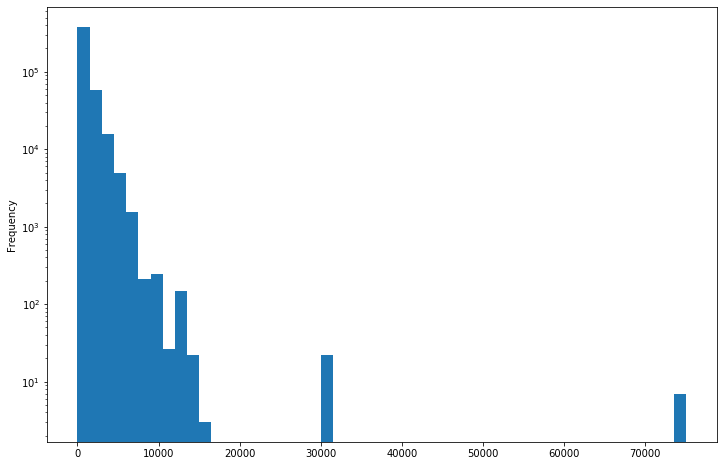

fl_passivel_iss


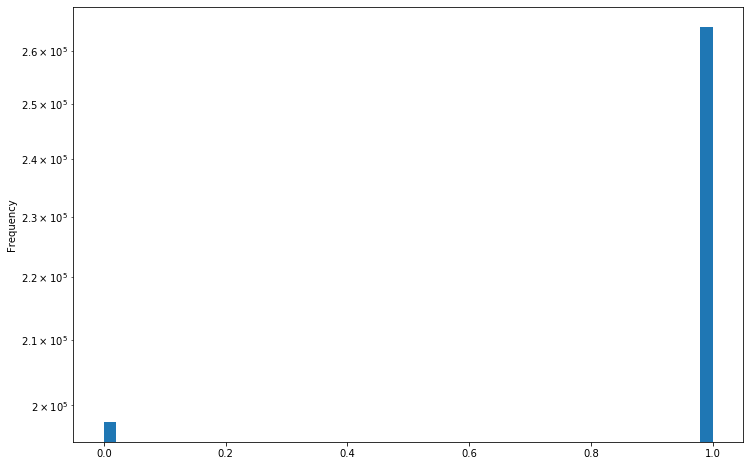

qt_socios


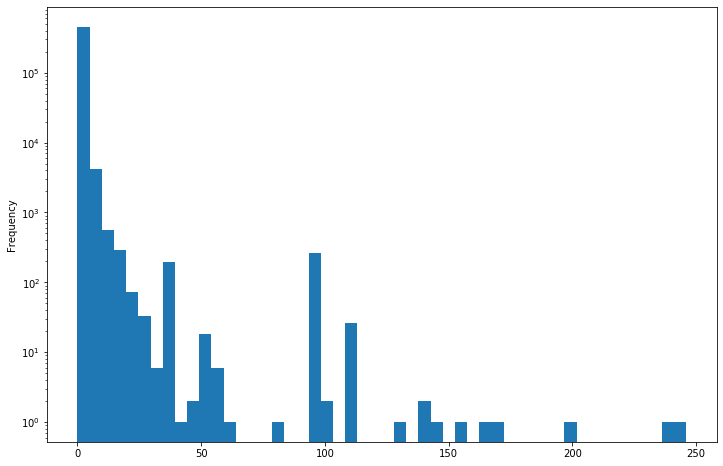

qt_socios_pf


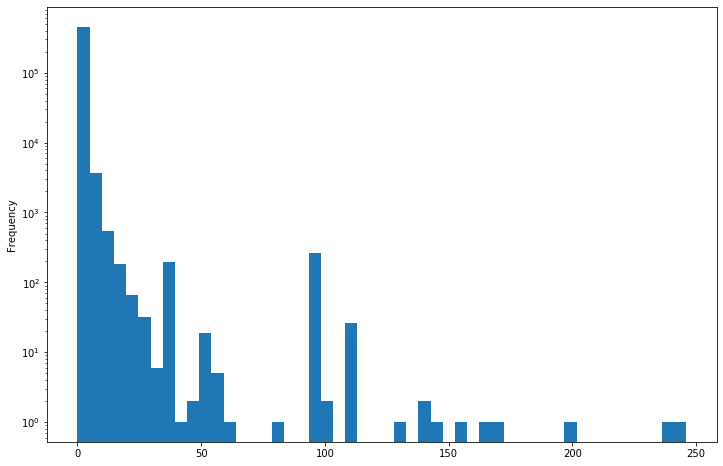

qt_socios_pj


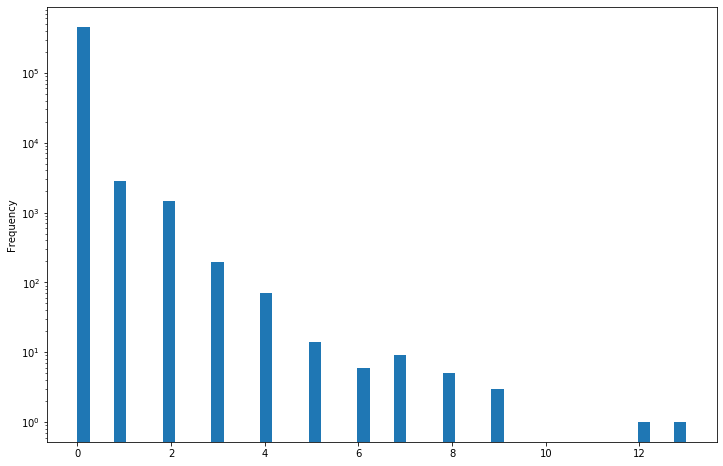

idade_media_socios


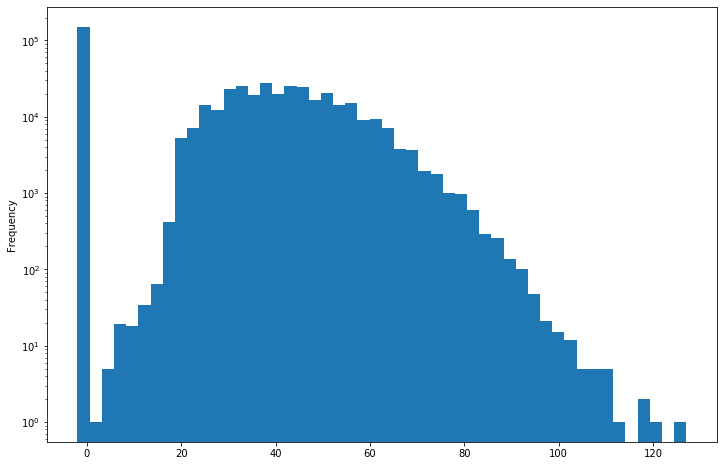

idade_maxima_socios


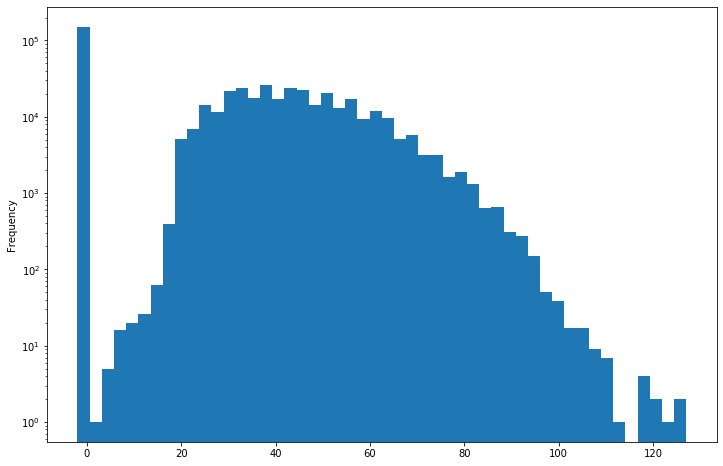

idade_minima_socios


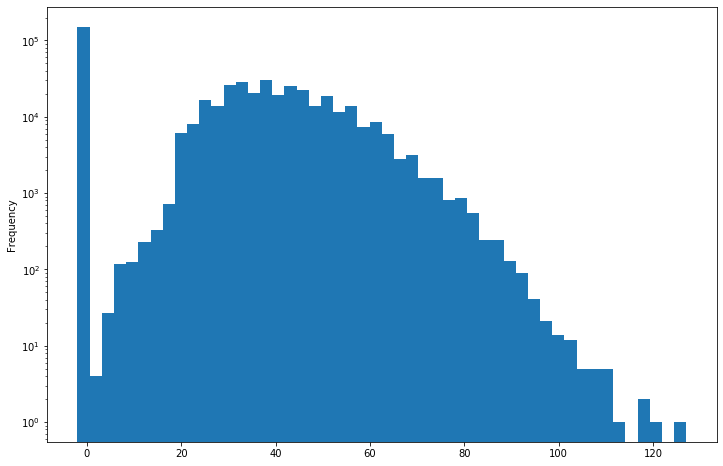

qt_socios_st_regular


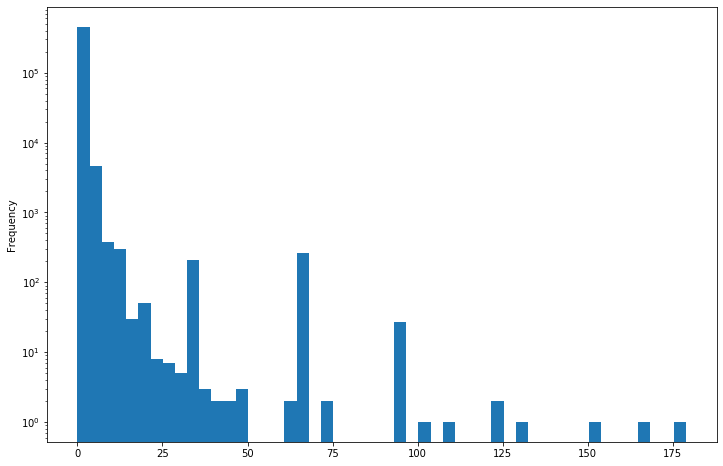

qt_socios_st_suspensa


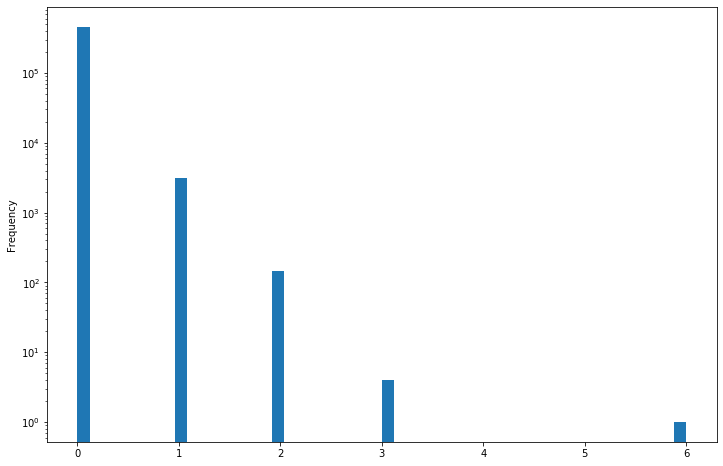

qt_socios_masculino


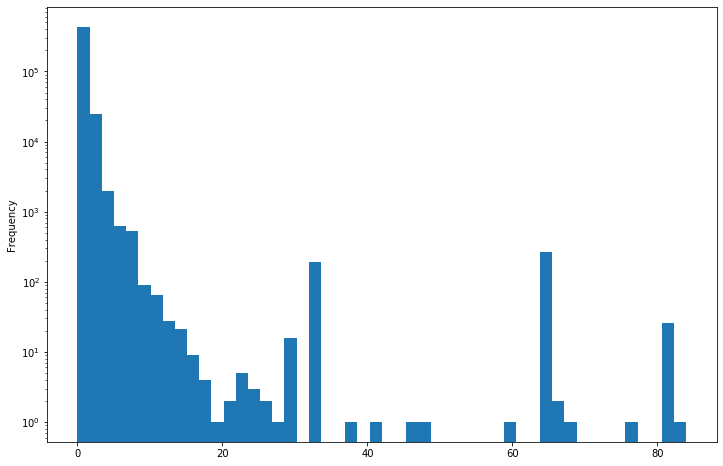

qt_socios_feminino


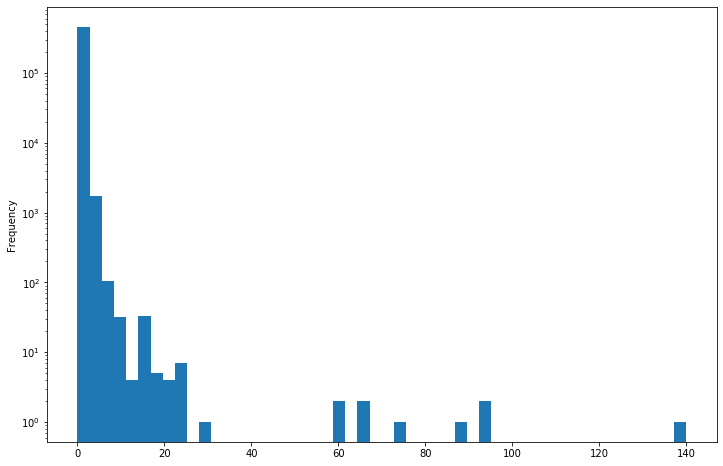

qt_socios_pep


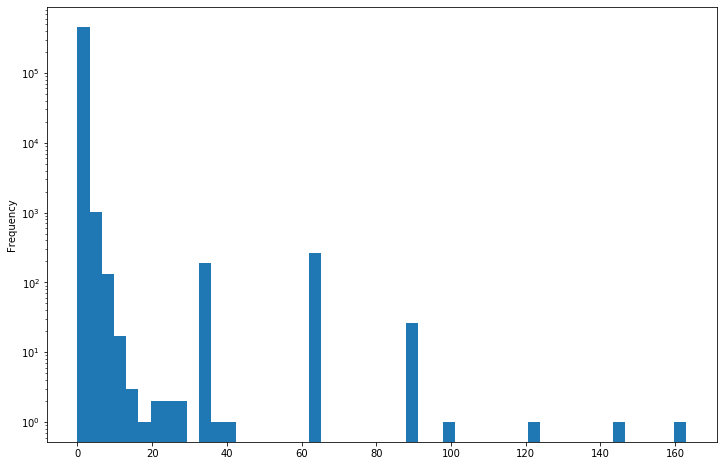

qt_socios_pj_ativos


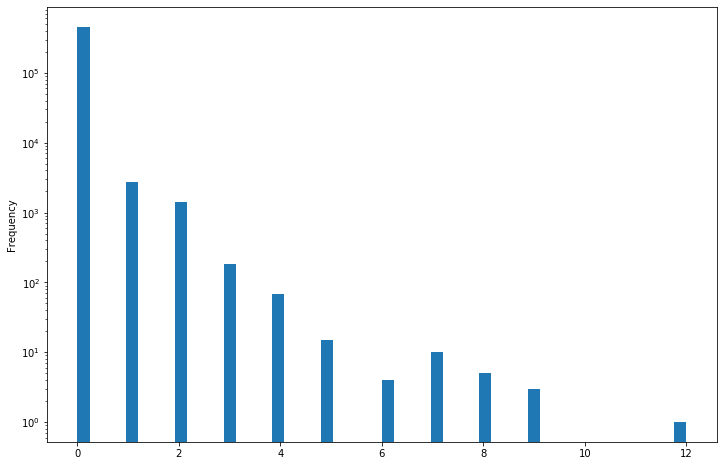

qt_socios_pj_nulos


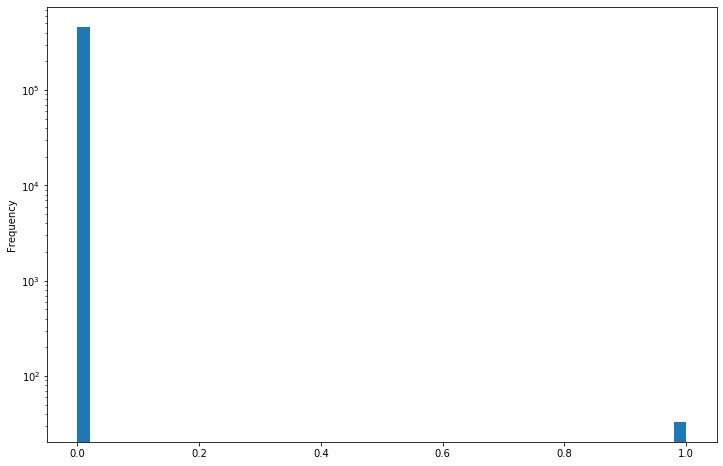

qt_socios_pj_baixados


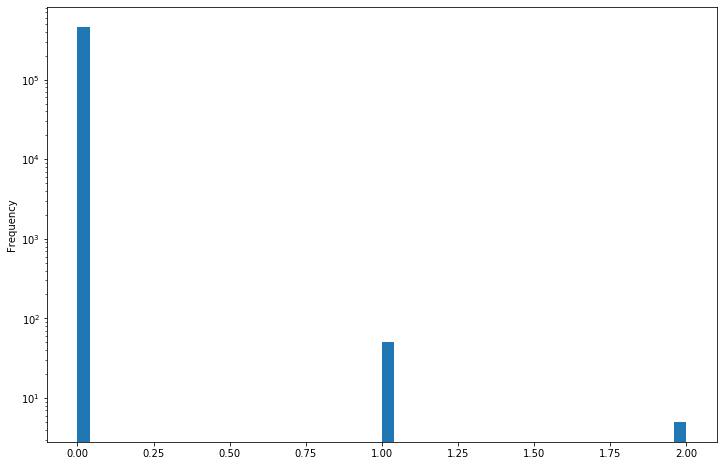

qt_socios_pj_suspensos


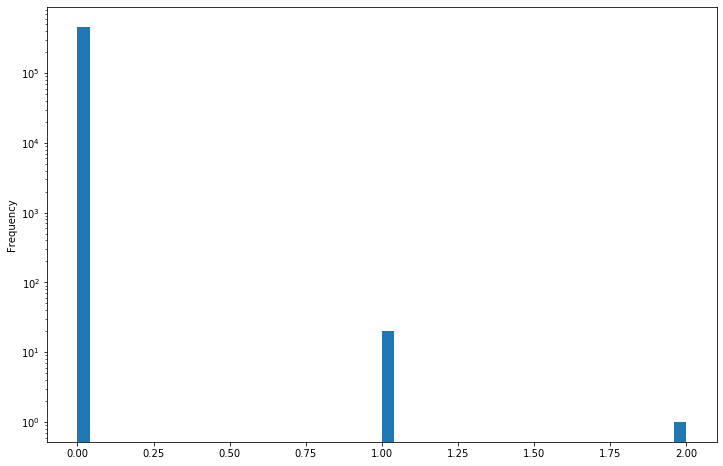

qt_socios_pj_inaptos


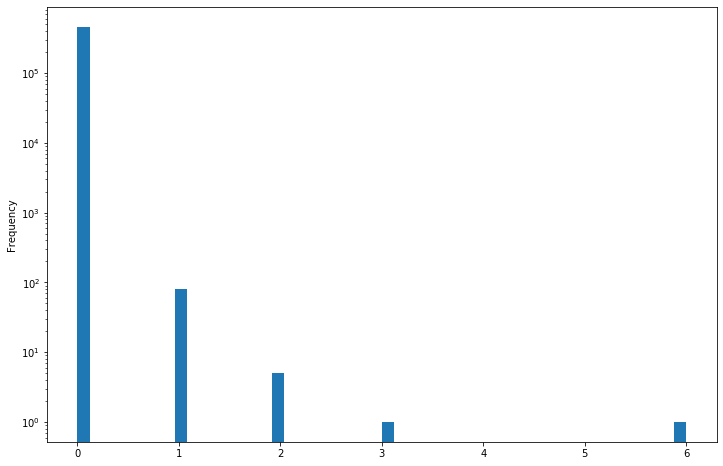

qt_coligados


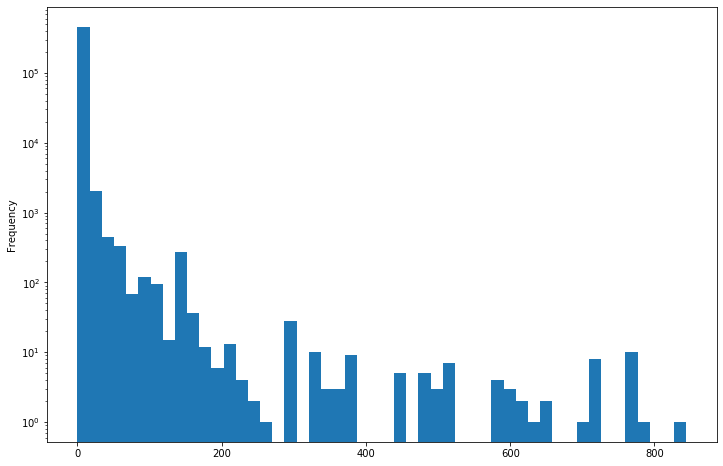

qt_socios_coligados


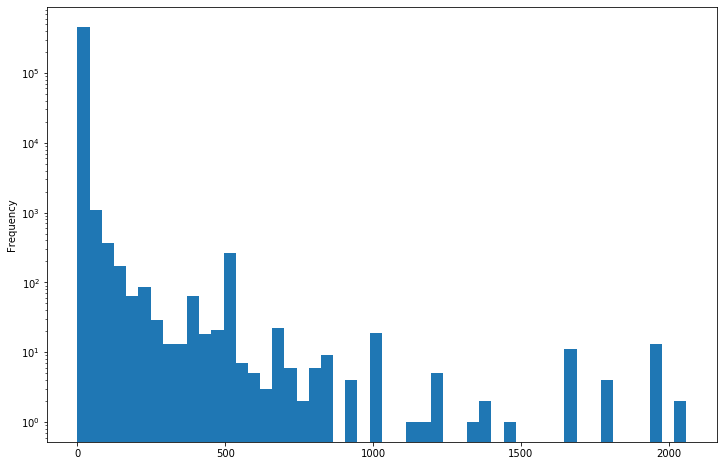

qt_coligados_matriz


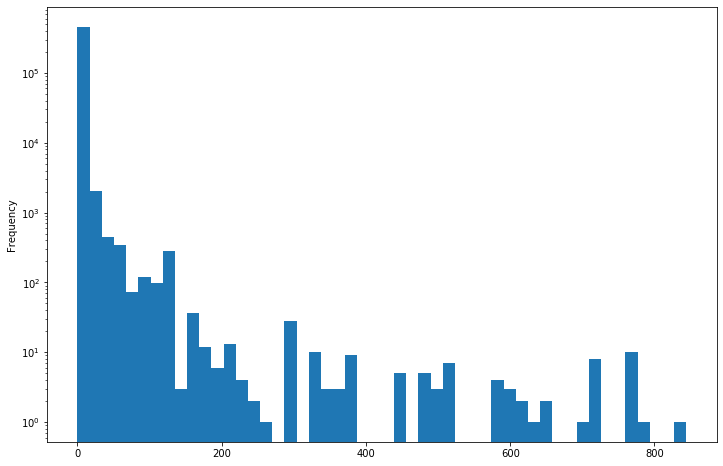

qt_coligados_ativo


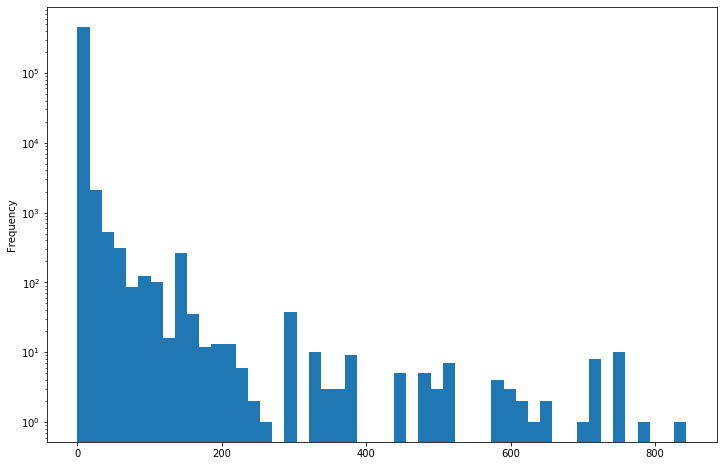

qt_coligados_baixada


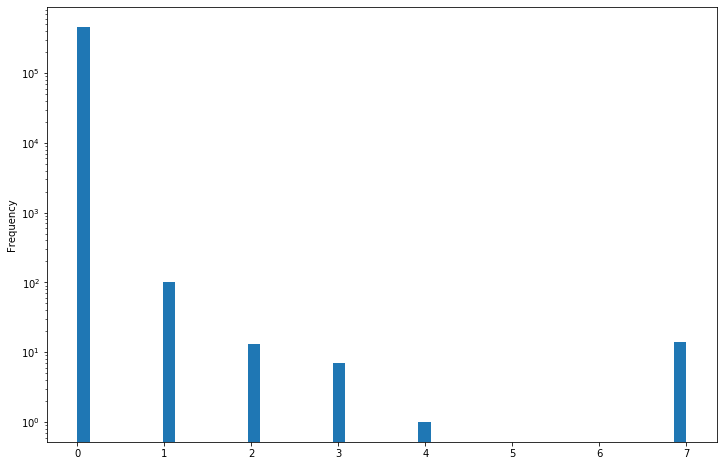

qt_coligados_inapta


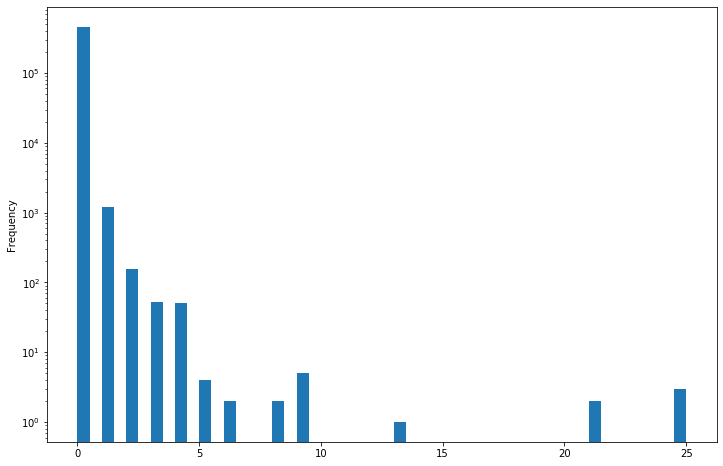

qt_coligados_suspensa


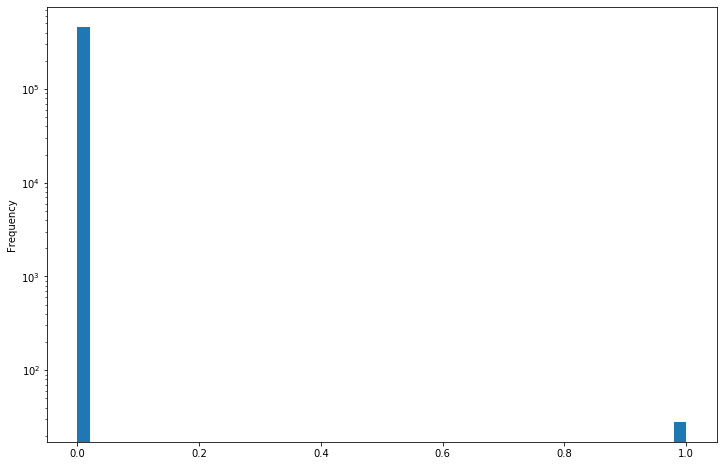

qt_coligados_sa


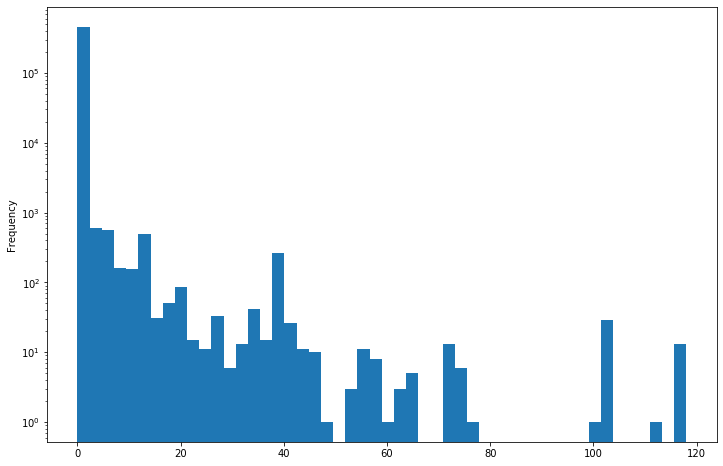

qt_coligados_me


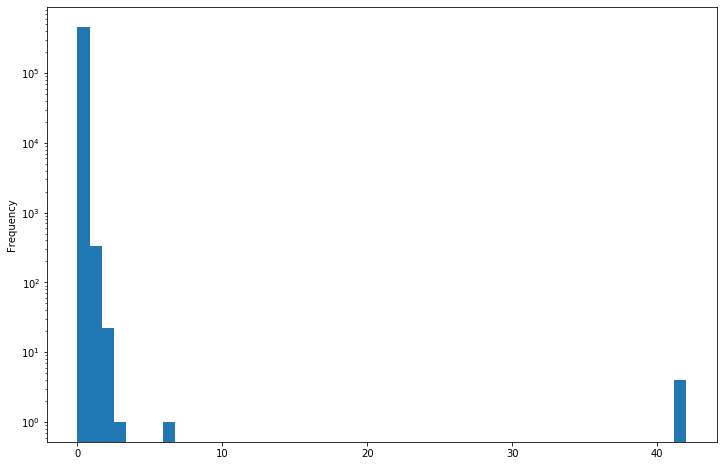

qt_coligados_mei


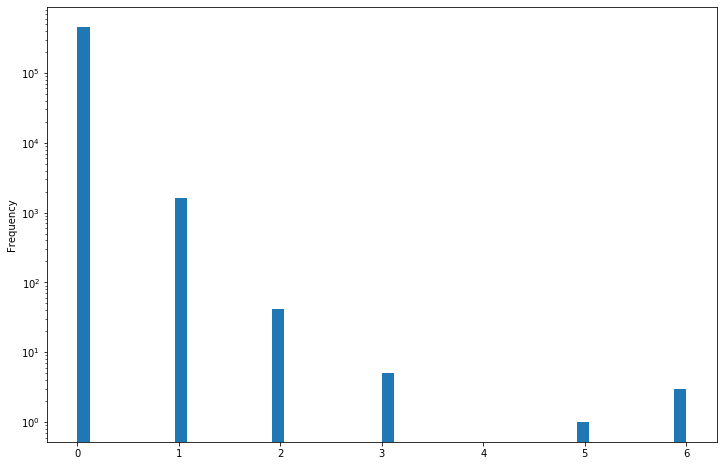

qt_coligados_ltda


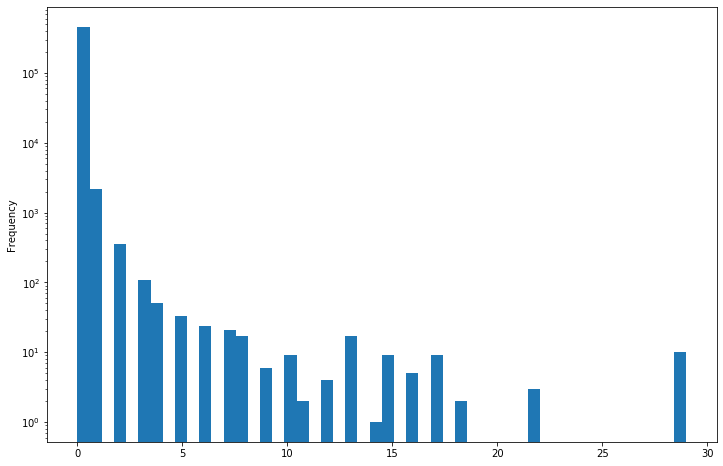

qt_coligados_epp


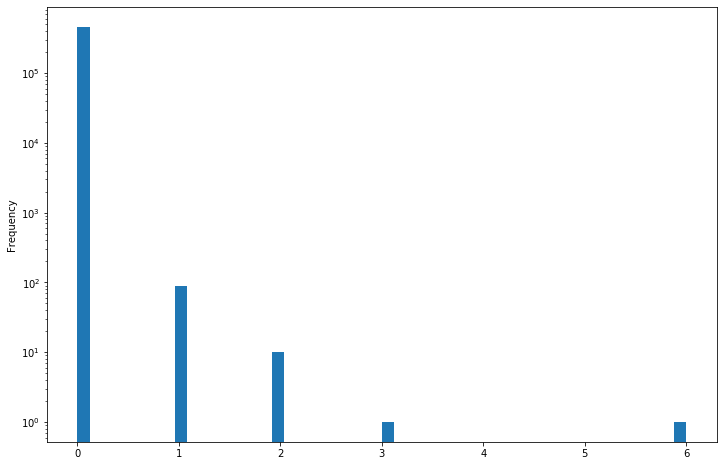

qt_coligados_norte


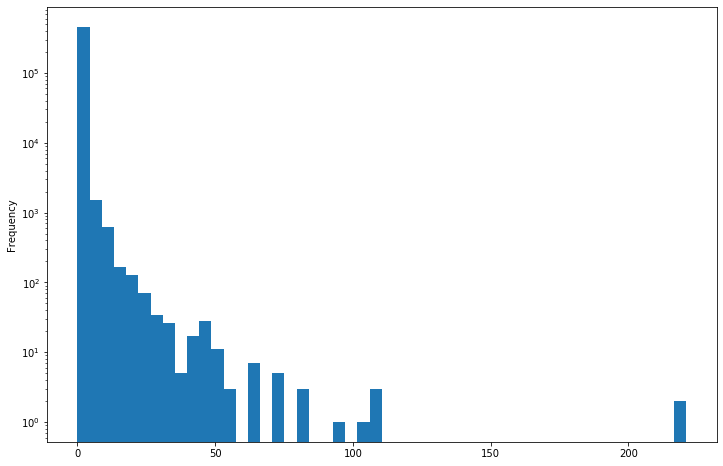

qt_coligados_sul


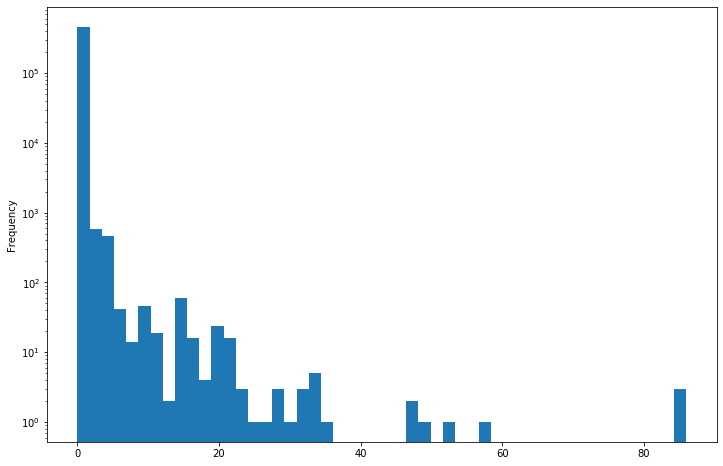

qt_coligados_nordeste


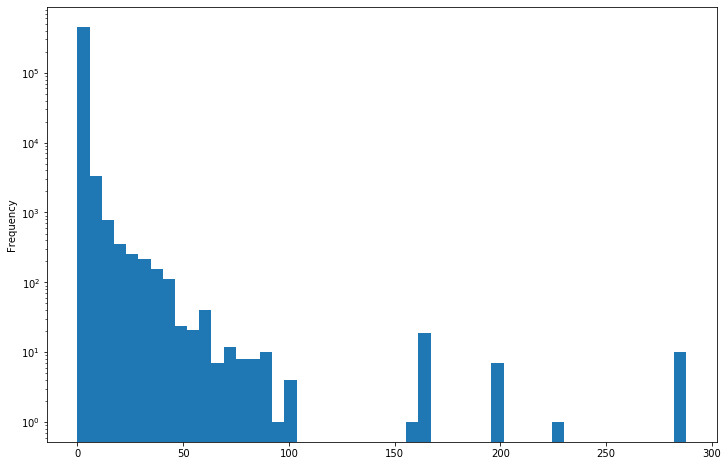

qt_coligados_centro


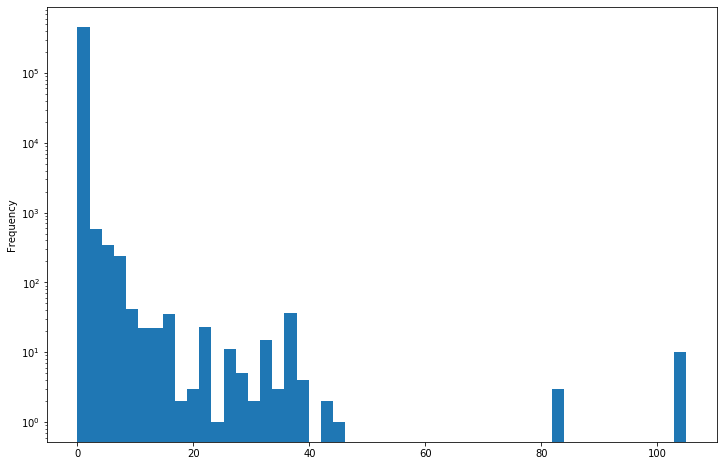

qt_coligados_sudeste


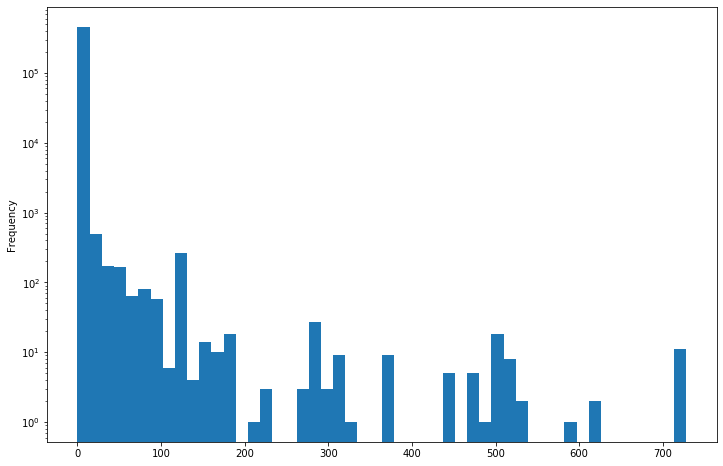

qt_coligados_exterior


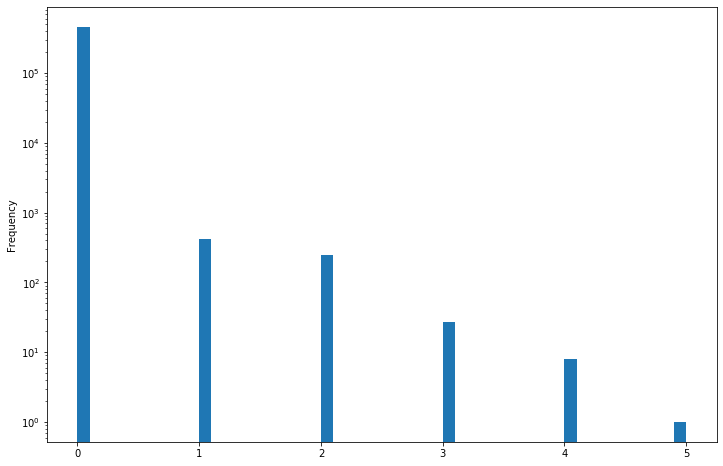

qt_ufs_coligados


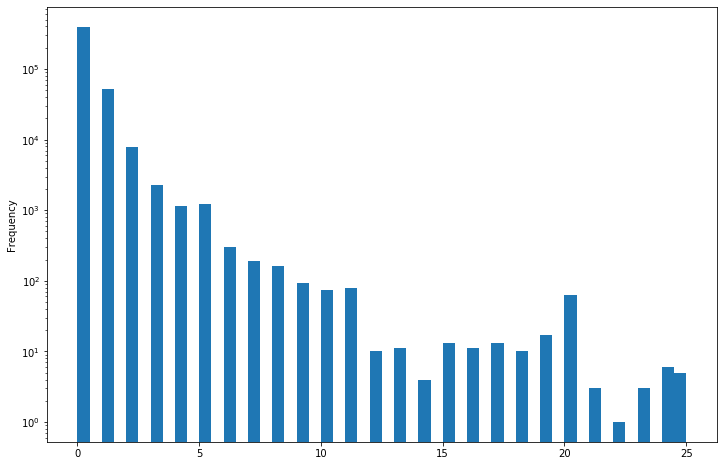

qt_regioes_coligados


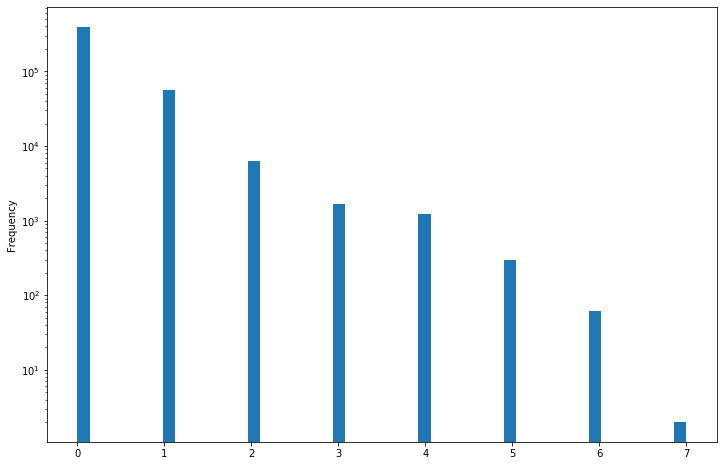

qt_ramos_coligados


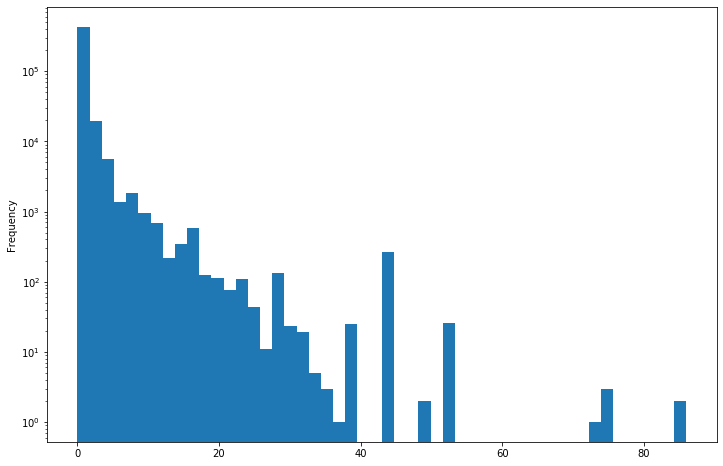

qt_coligados_industria


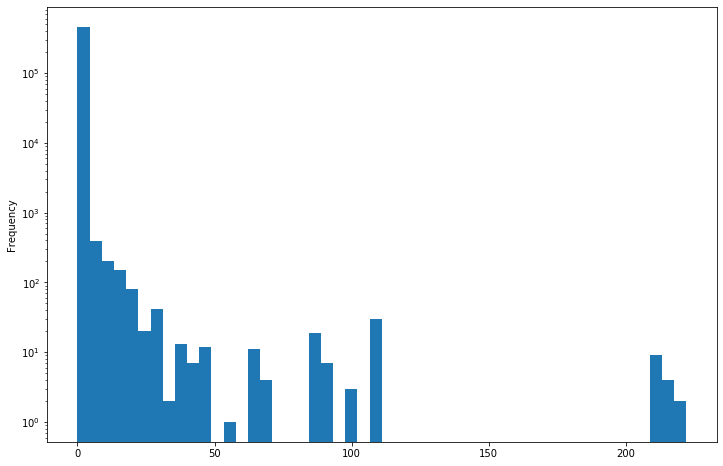

qt_coligados_agropecuaria


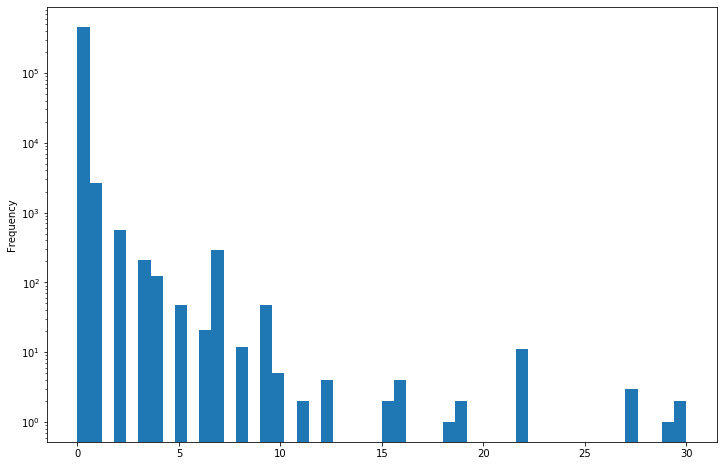

qt_coligados_comercio


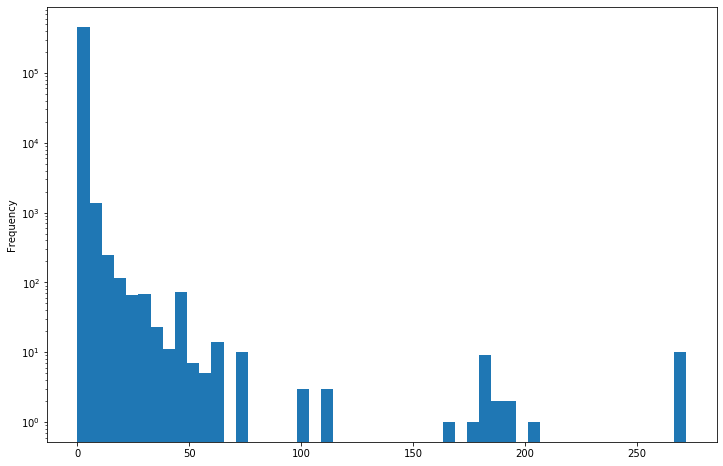

qt_coligados_serviço


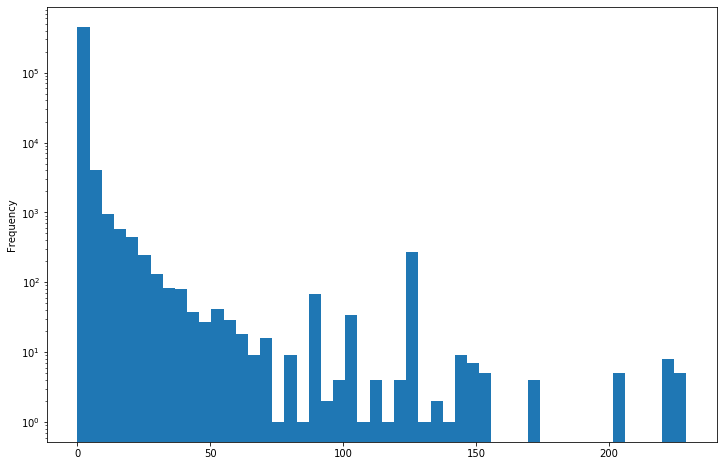

qt_coligados_ccivil


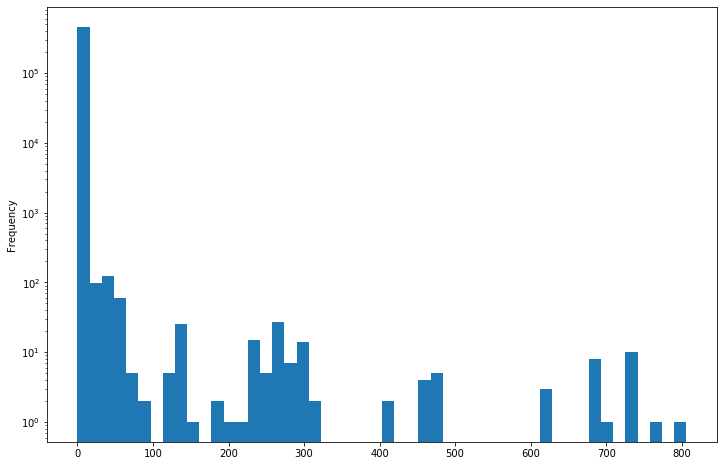

qt_funcionarios_coligados


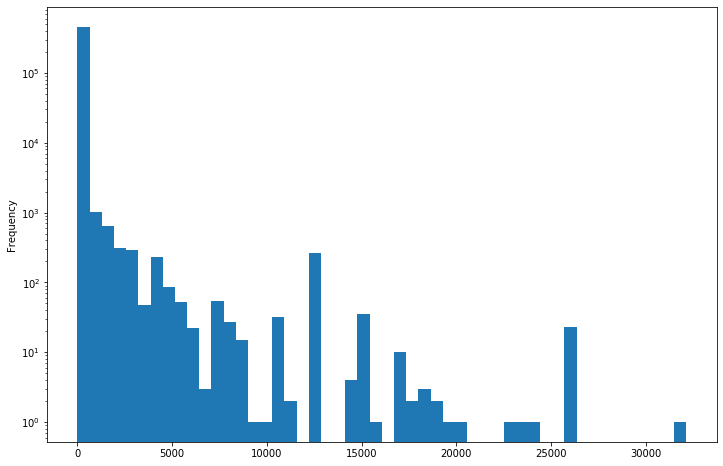

qt_funcionarios_coligados_gp


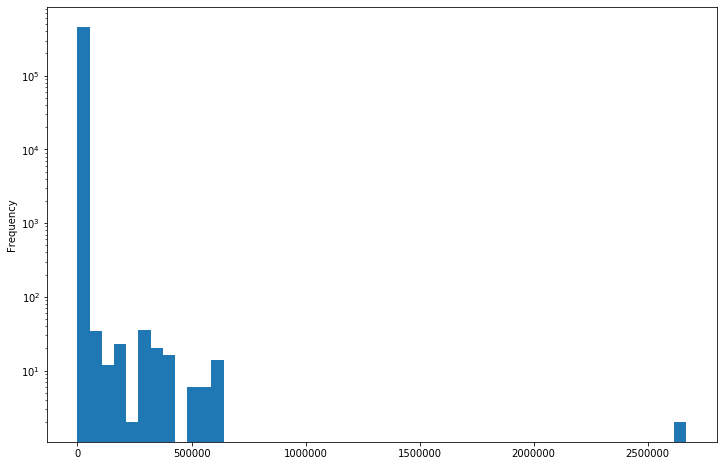

vl_folha_coligados


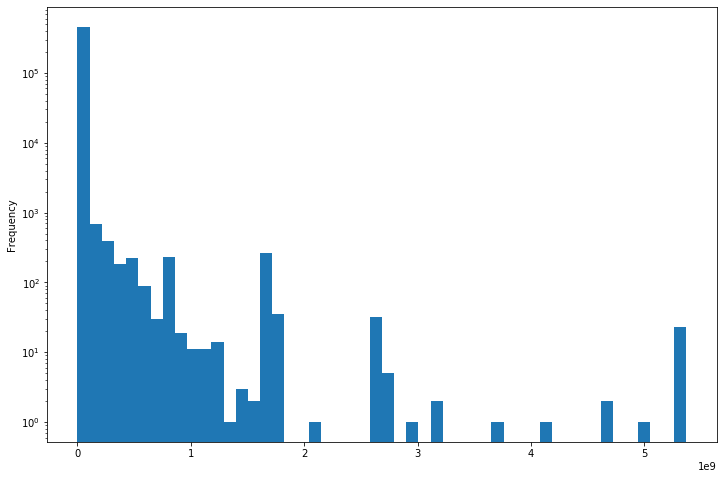

media_vl_folha_coligados


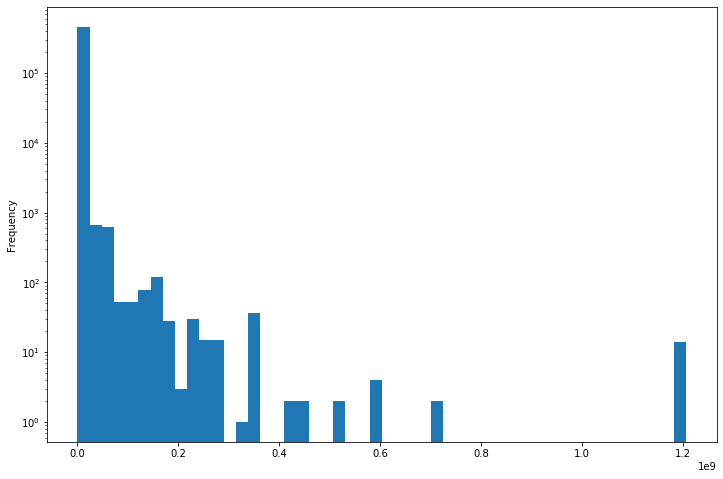

max_vl_folha_coligados


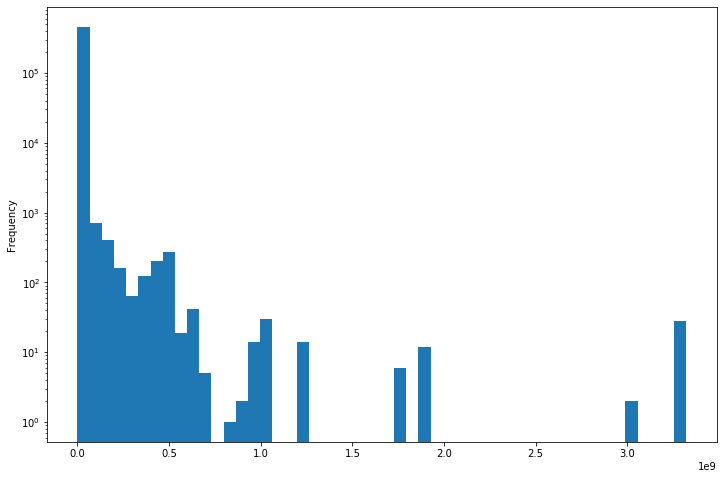

min_vl_folha_coligados


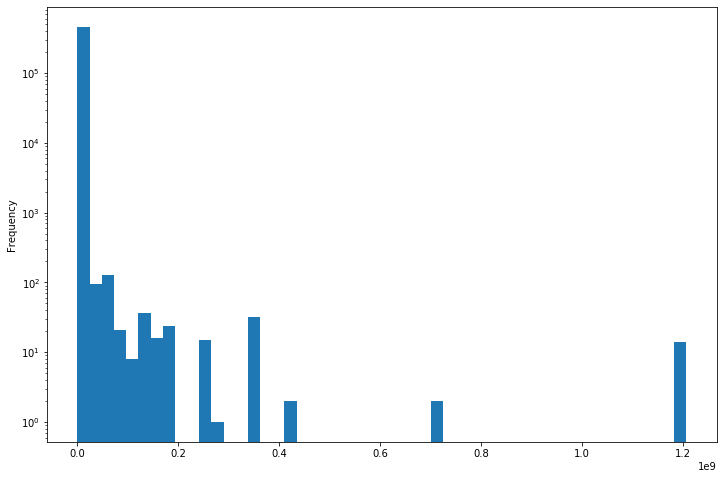

vl_folha_coligados_gp


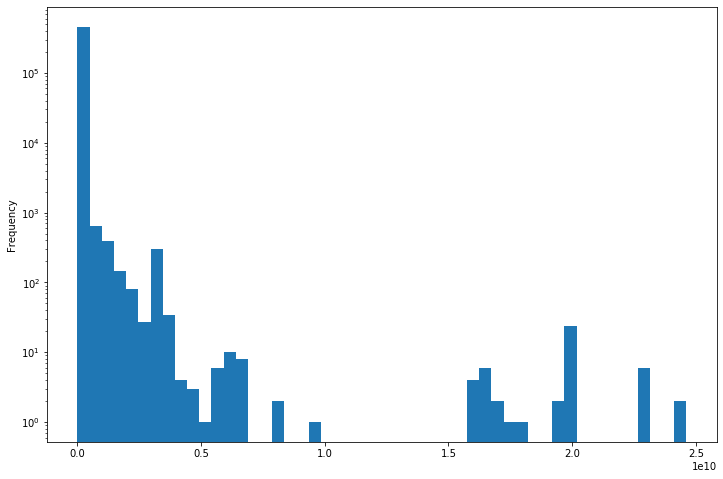

media_vl_folha_coligados_gp


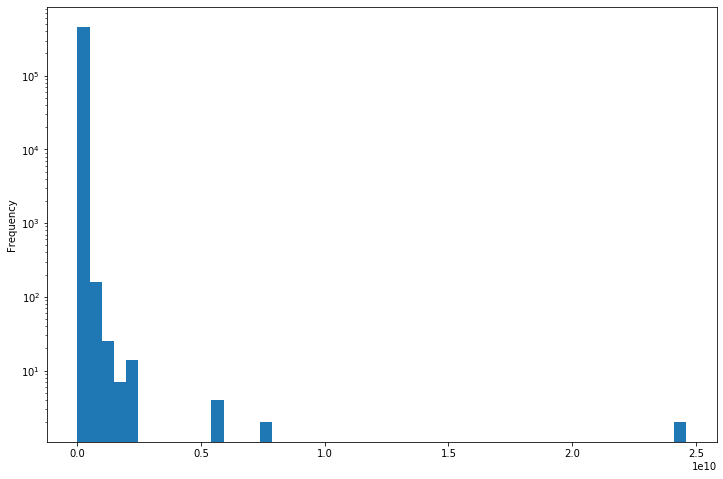

max_vl_folha_coligados_gp


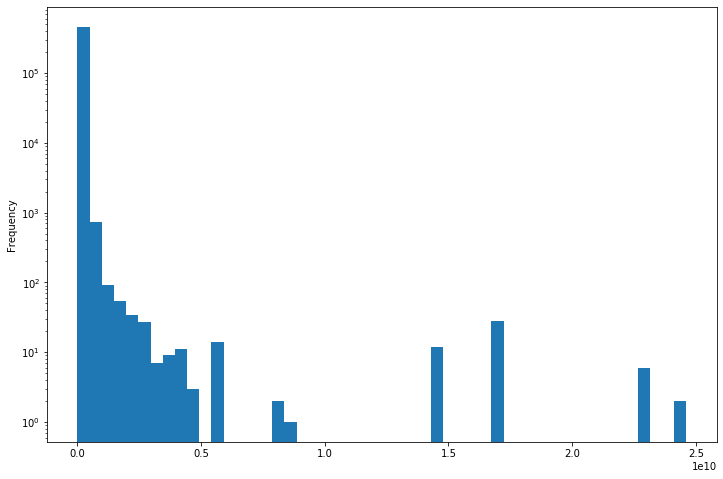

min_vl_folha_coligados_gp


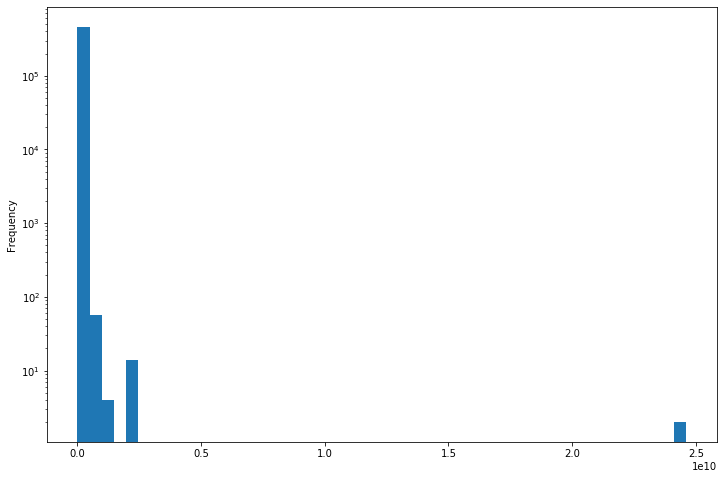

faturamento_est_coligados


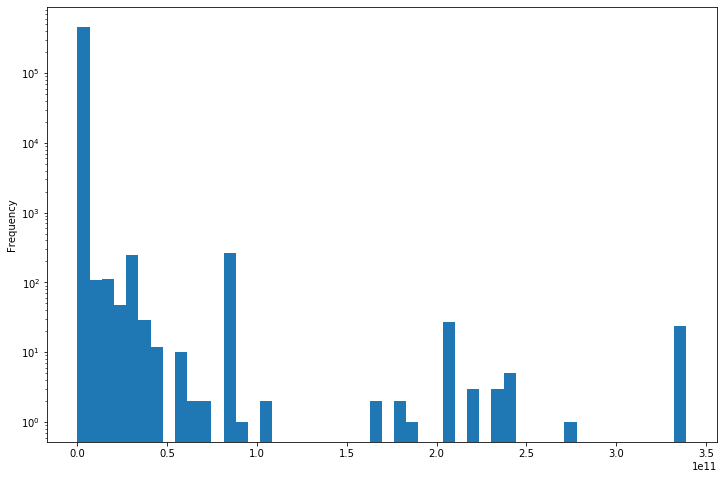

media_faturamento_est_coligados


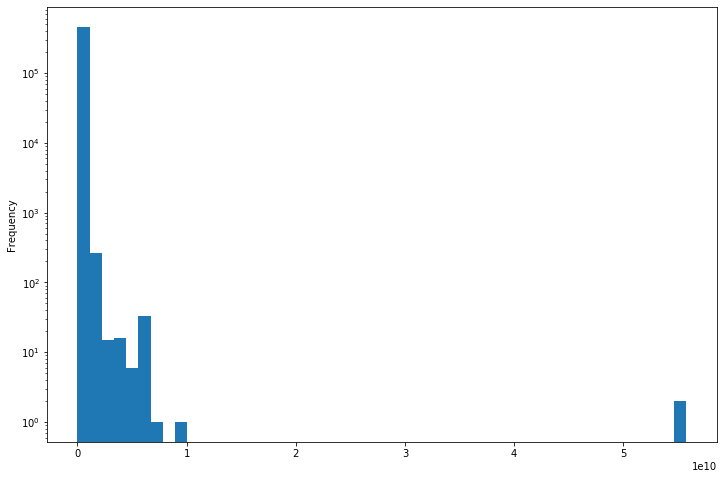

max_faturamento_est_coligados


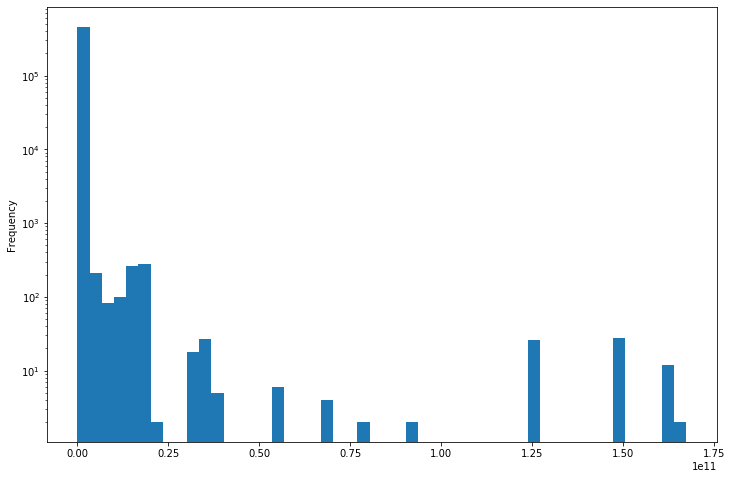

min_faturamento_est_coligados


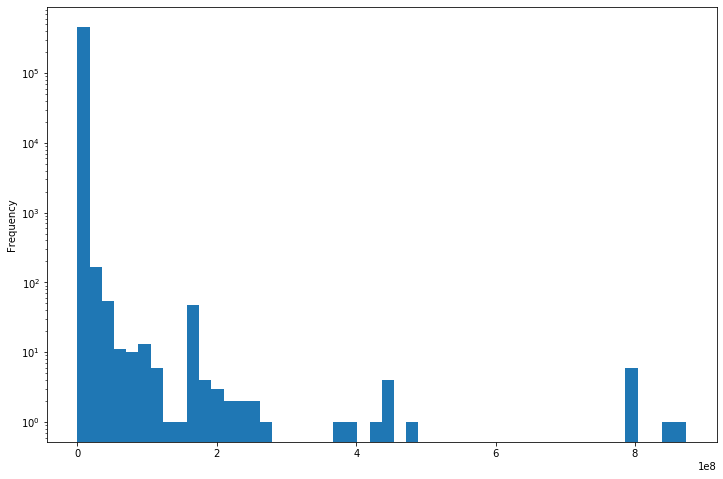

faturamento_est_coligados_gp


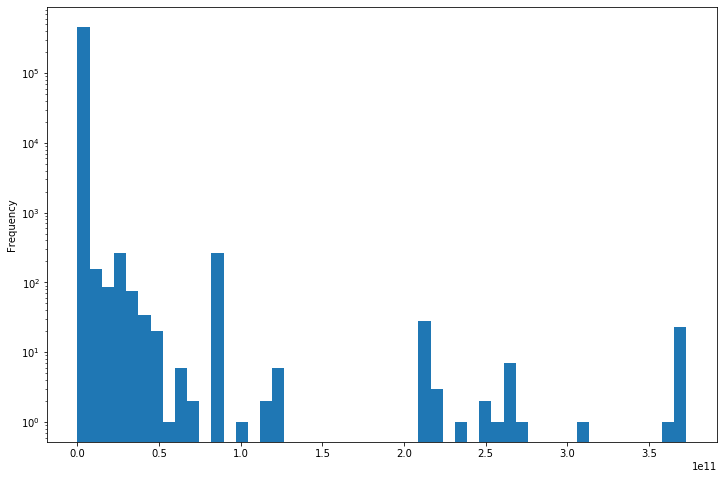

media_faturamento_est_coligados_gp


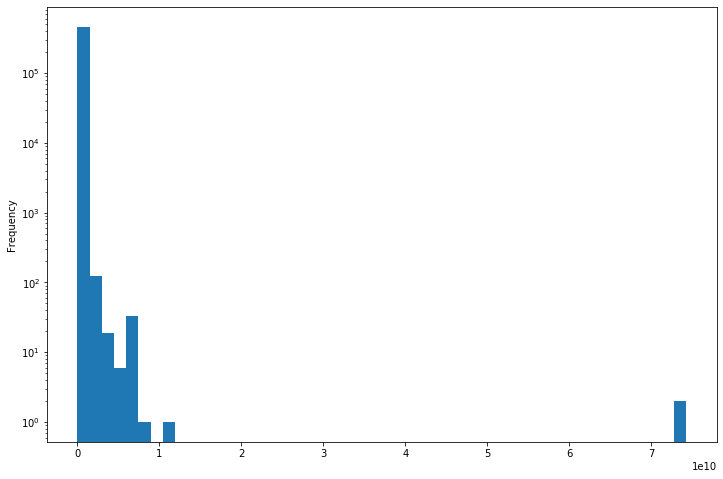

max_faturamento_est_coligados_gp


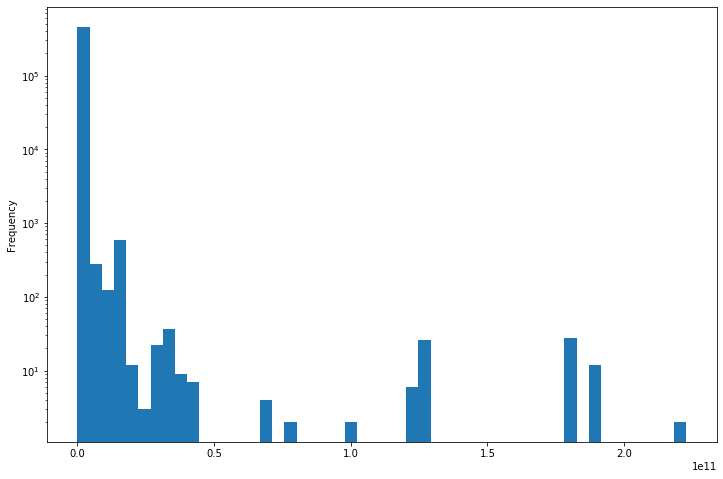

min_faturamento_est_coligados_gp


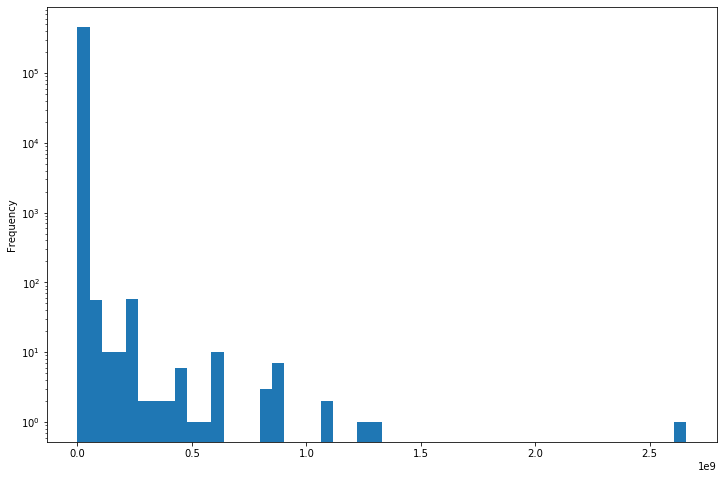

qt_coligadas


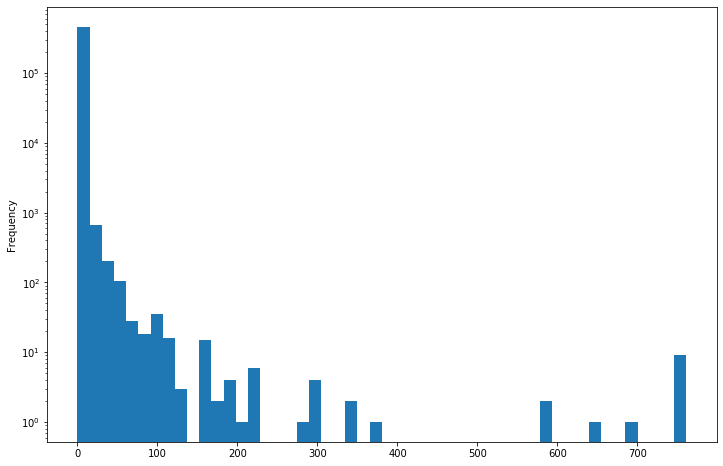

sum_faturamento_estimado_coligadas


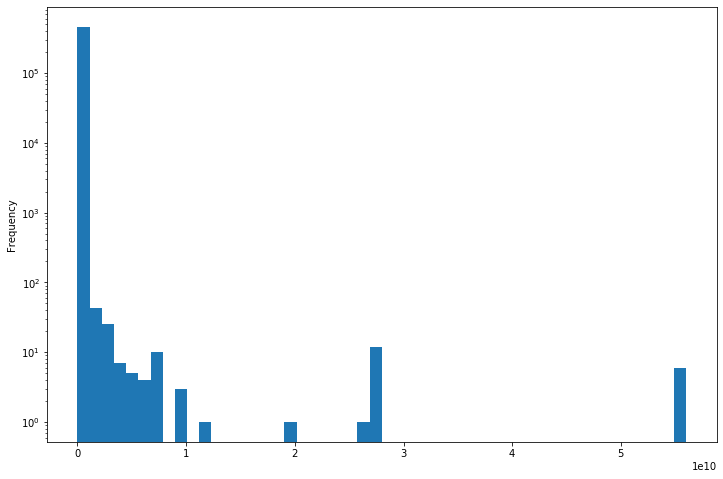

vl_faturamento_estimado_aux


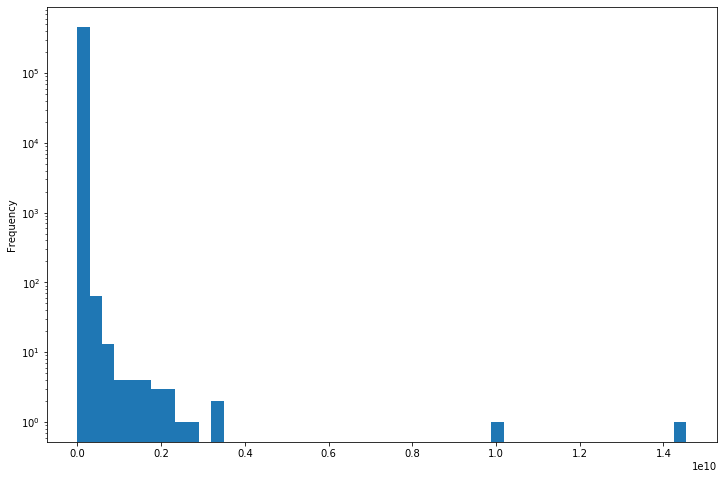

vl_faturamento_estimado_grupo_aux


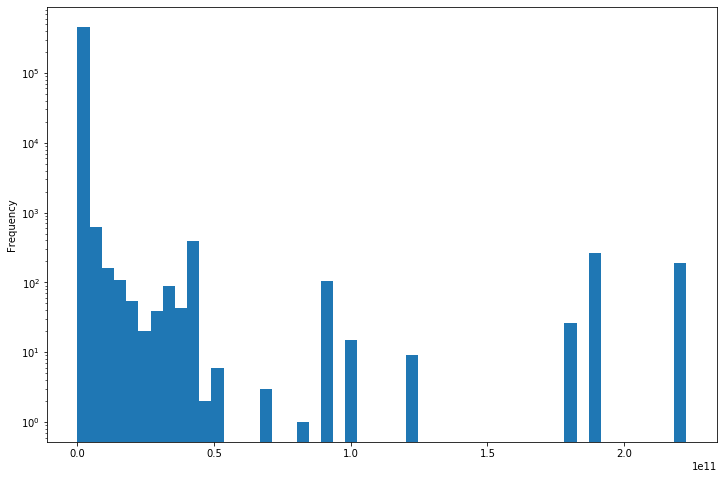

qt_ex_funcionarios


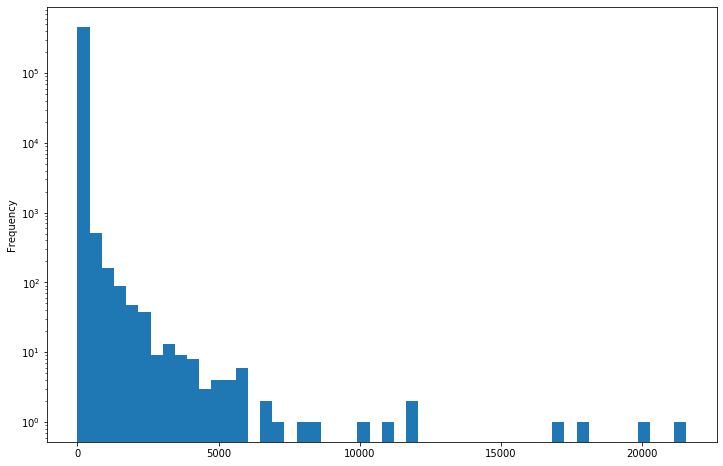

qt_funcionarios_grupo


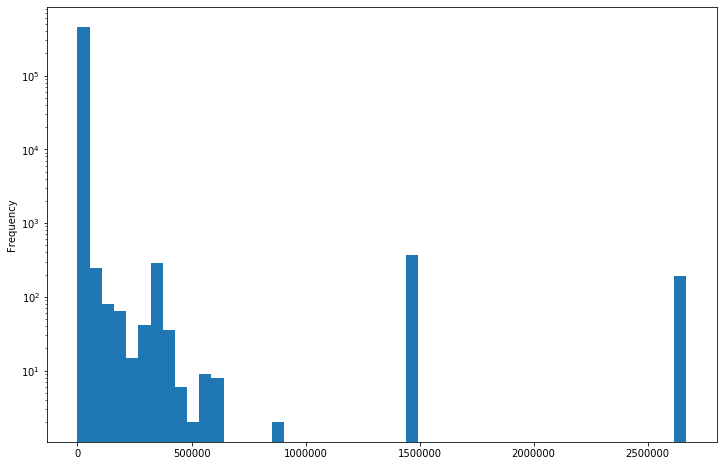

percent_func_genero_masc


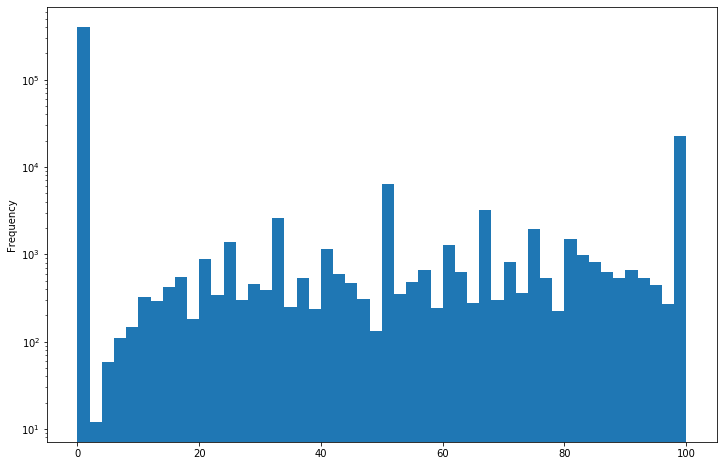

percent_func_genero_fem


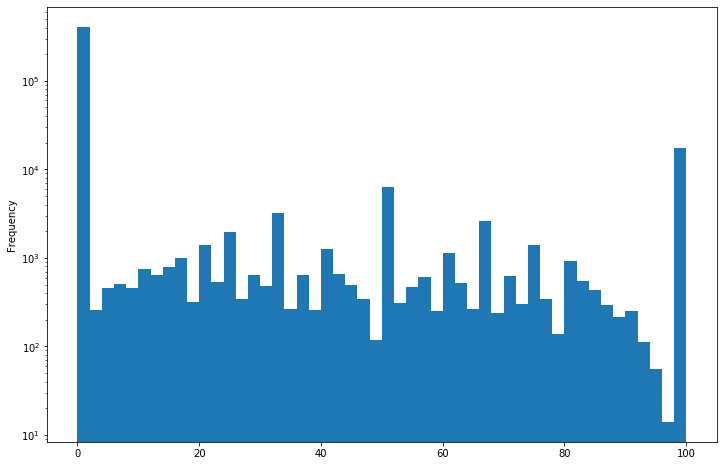

total


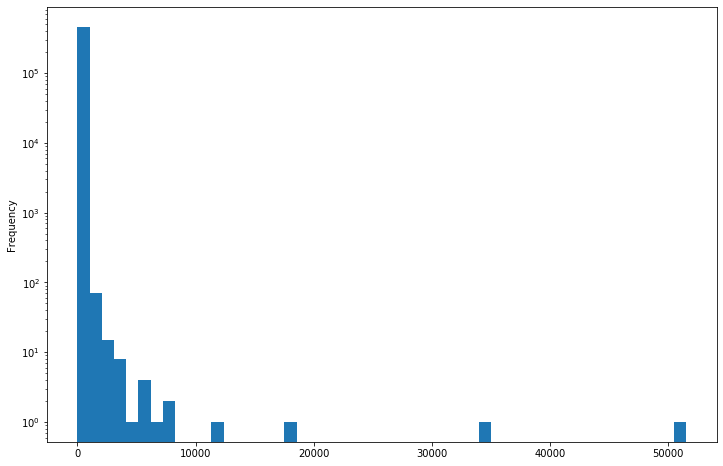

qt_admitidos_12meses


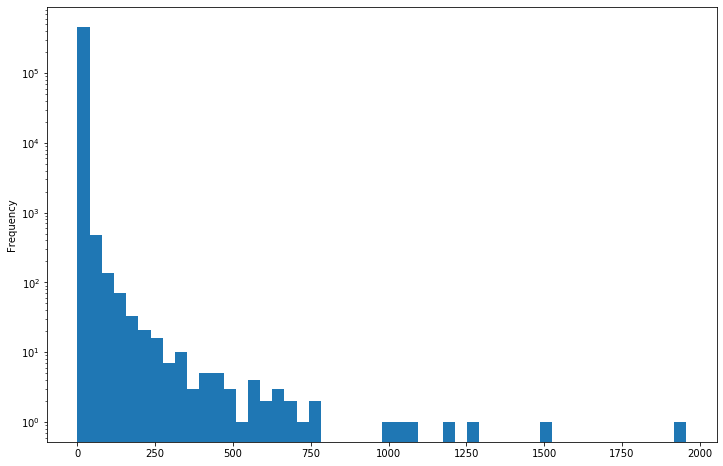

qt_desligados_12meses


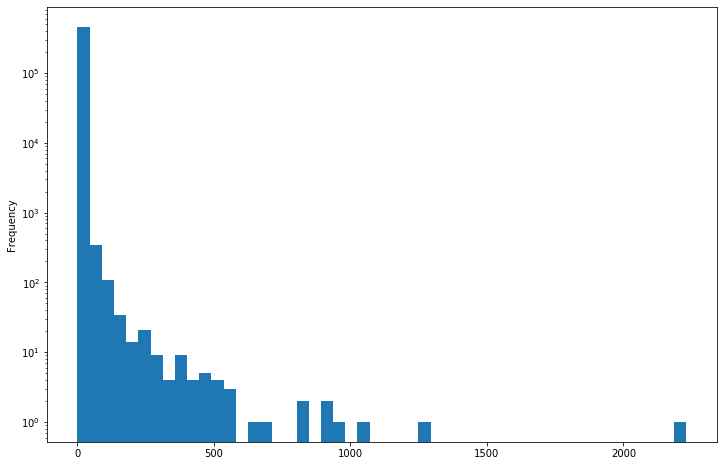

qt_desligados


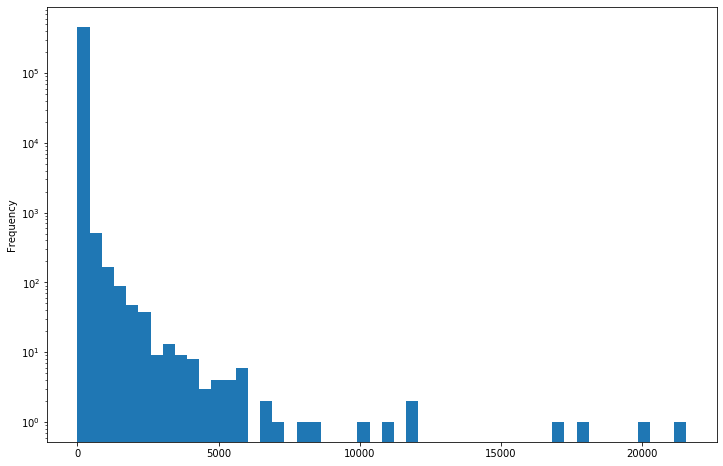

qt_admitidos


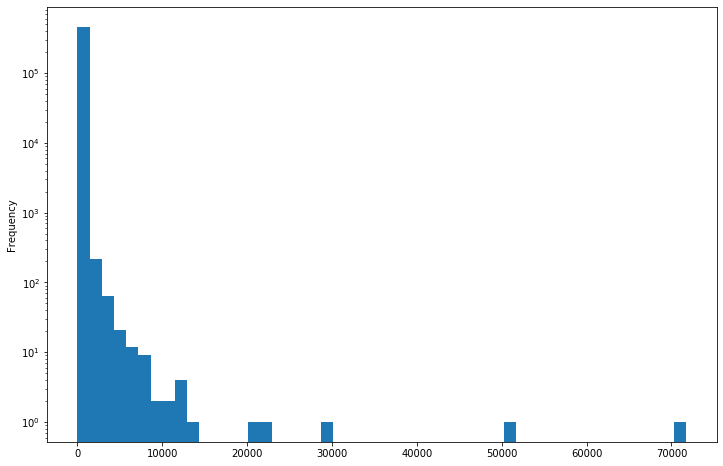

qt_funcionarios


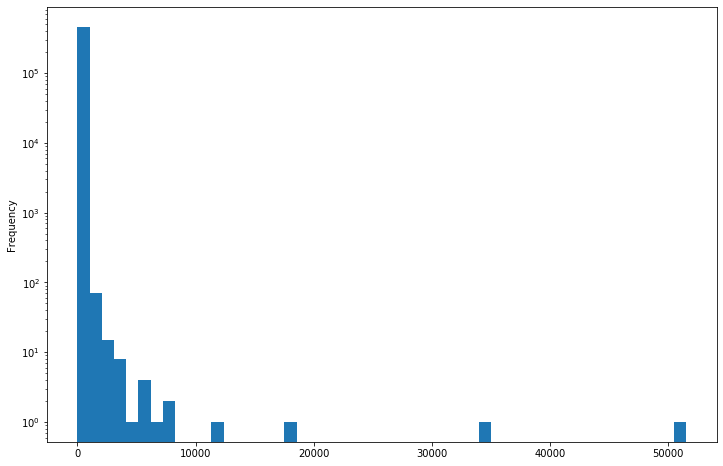

qt_funcionarios_12meses


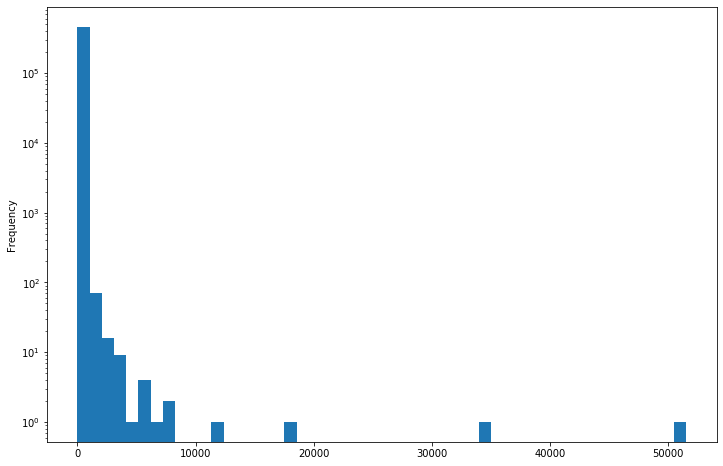

qt_funcionarios_24meses


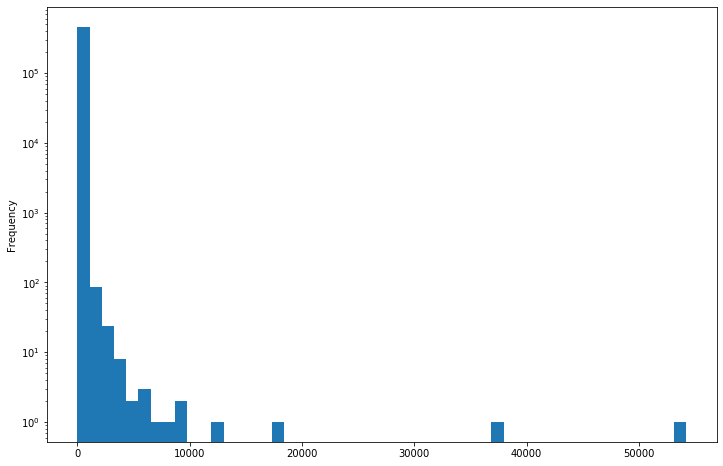

qt_filiais


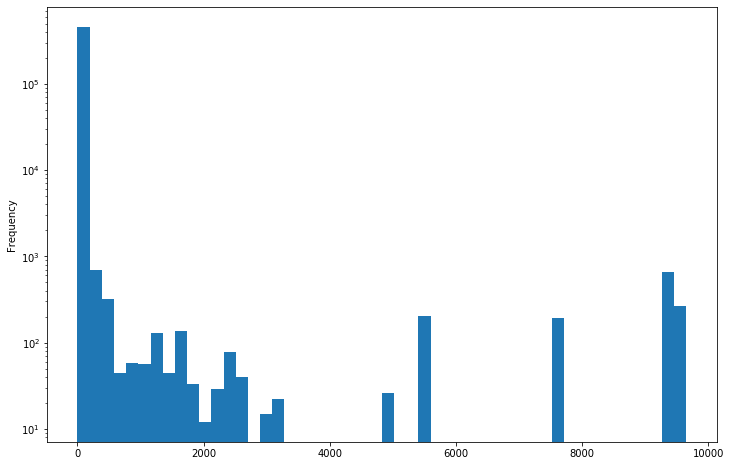

sg_uf_AC


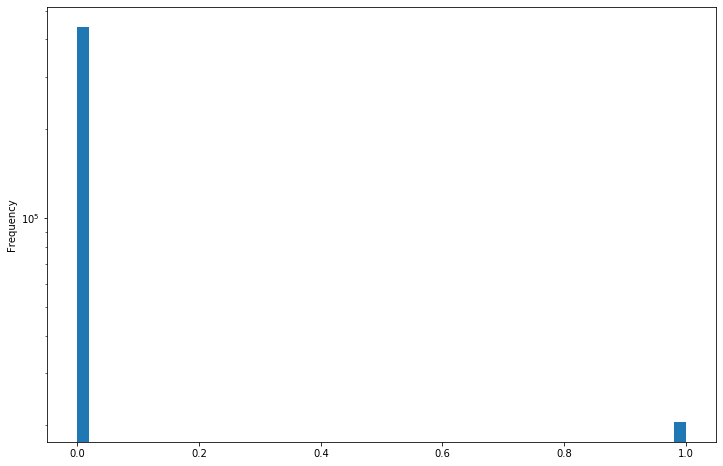

sg_uf_AM


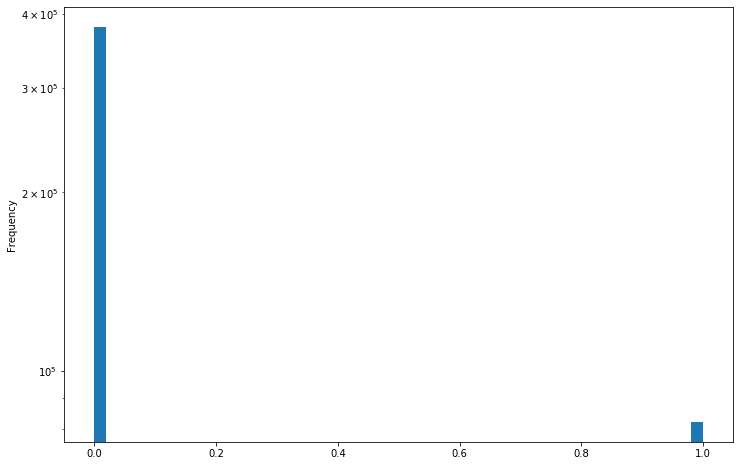

sg_uf_MA


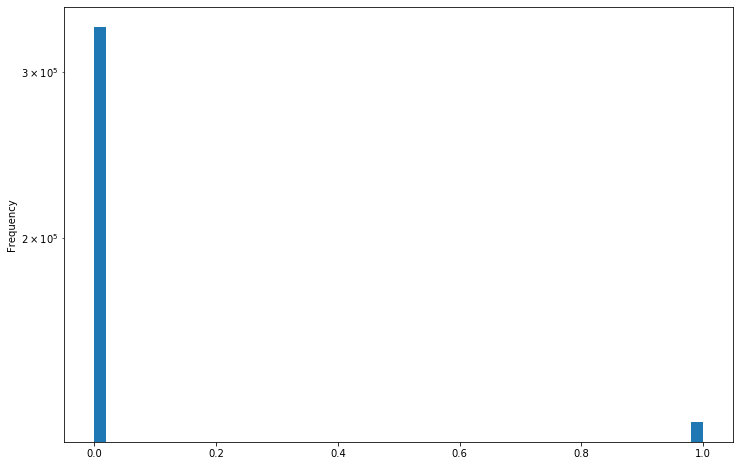

sg_uf_PI


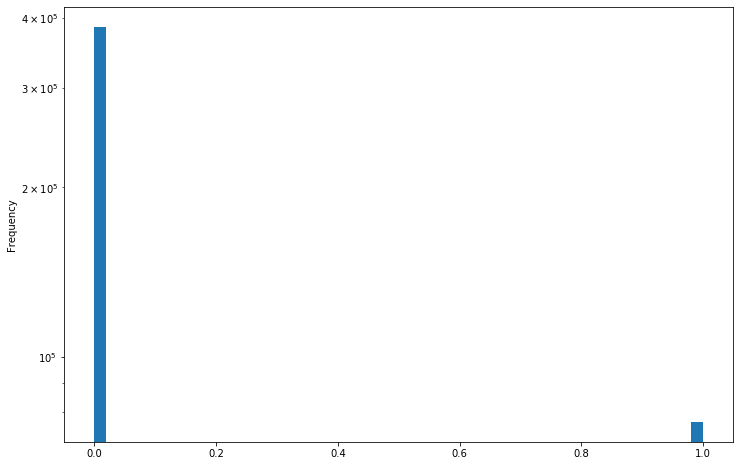

sg_uf_RN


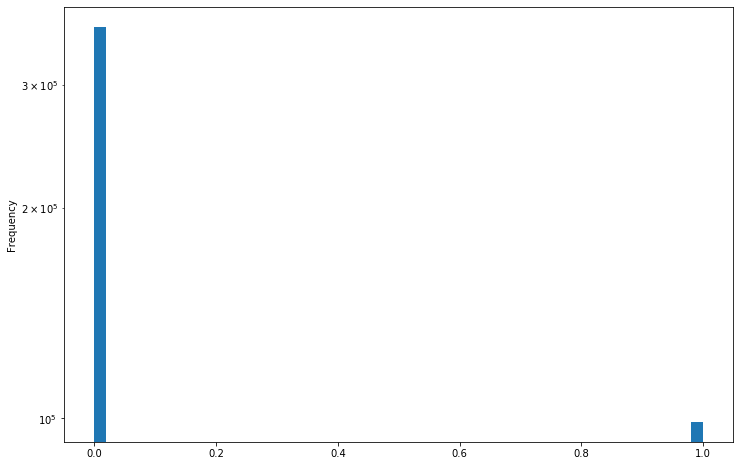

sg_uf_RO


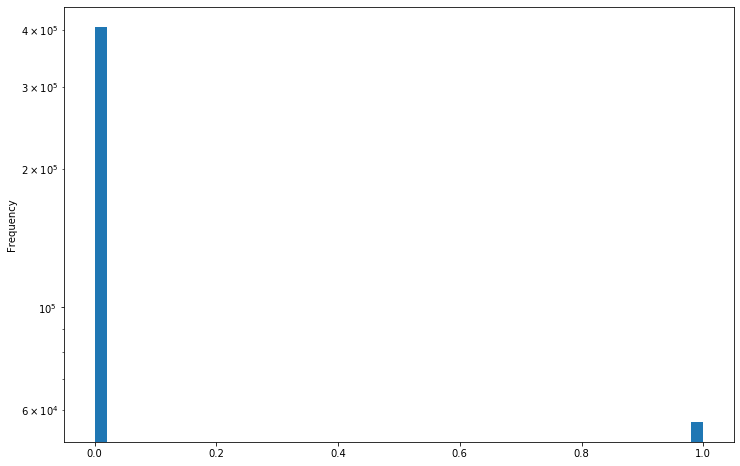

natureza_juridica_macro_ADMINISTRACAO PUBLICA


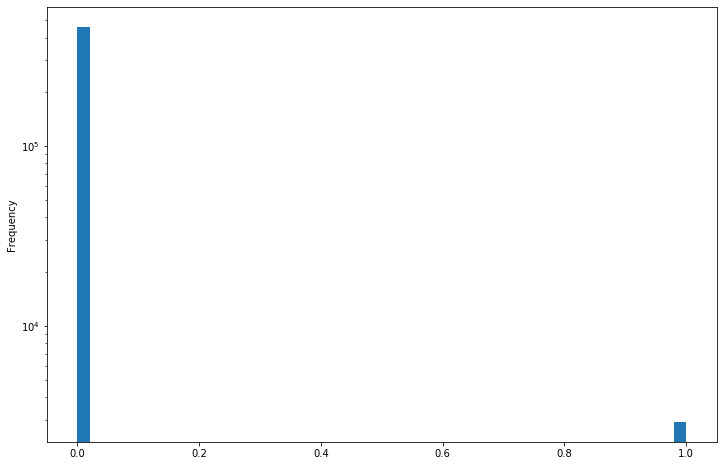

natureza_juridica_macro_CARGO POLITICO


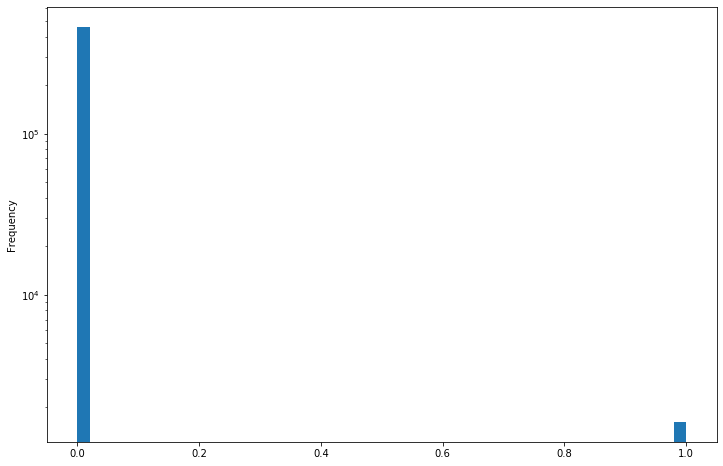

natureza_juridica_macro_ENTIDADES EMPRESARIAIS


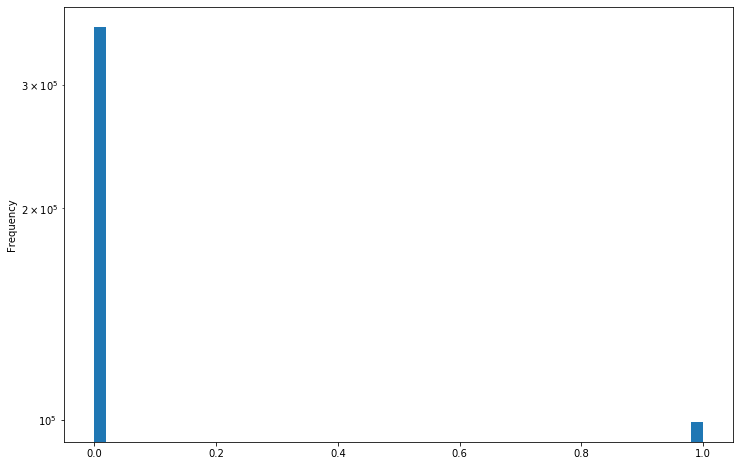

natureza_juridica_macro_ENTIDADES SEM FINS LUCRATIVOS


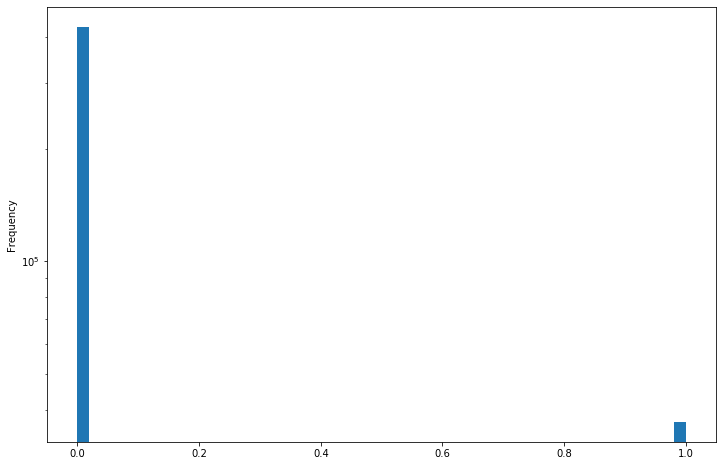

natureza_juridica_macro_INSTITUICOES EXTRATERRITORIAIS


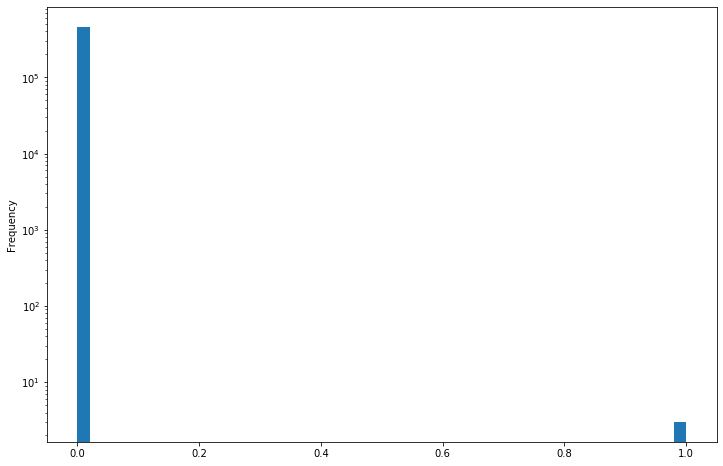

natureza_juridica_macro_OUTROS


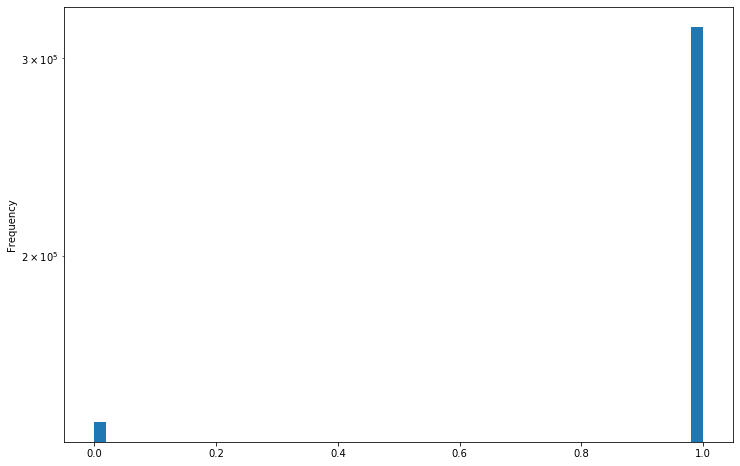

natureza_juridica_macro_PESSOAS FISICAS


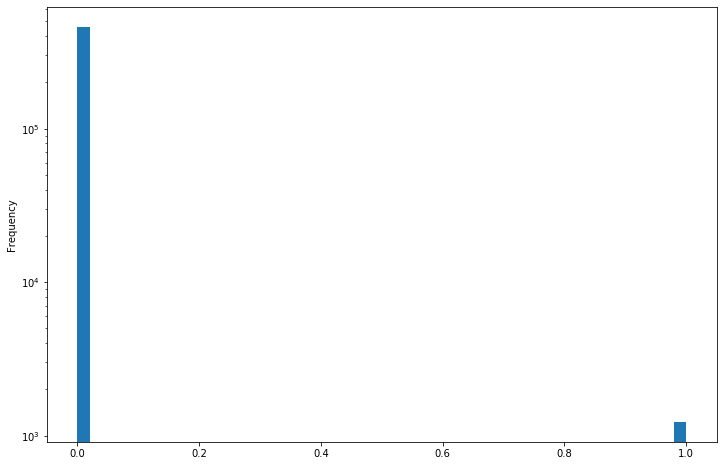

setor_AGROPECUARIA


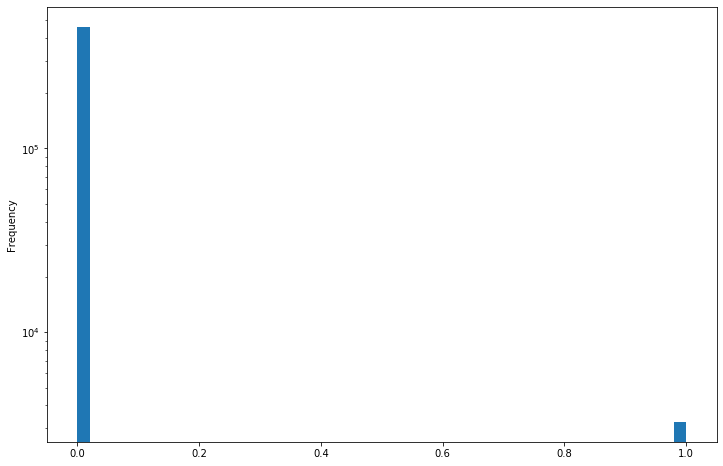

setor_COMERCIO


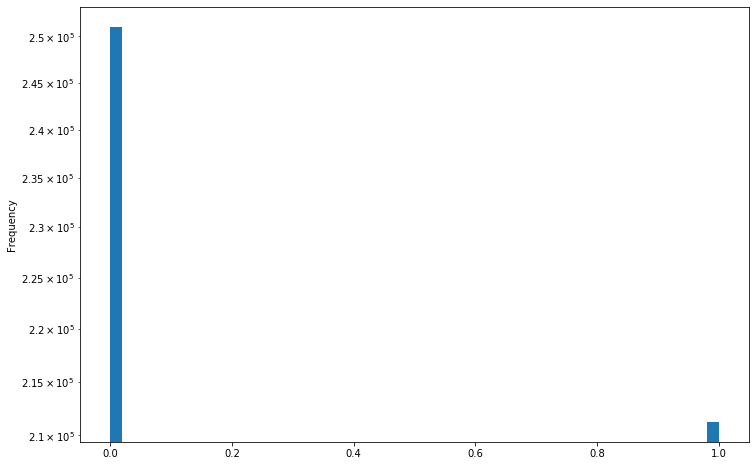

setor_CONSTRUÇÃO CIVIL


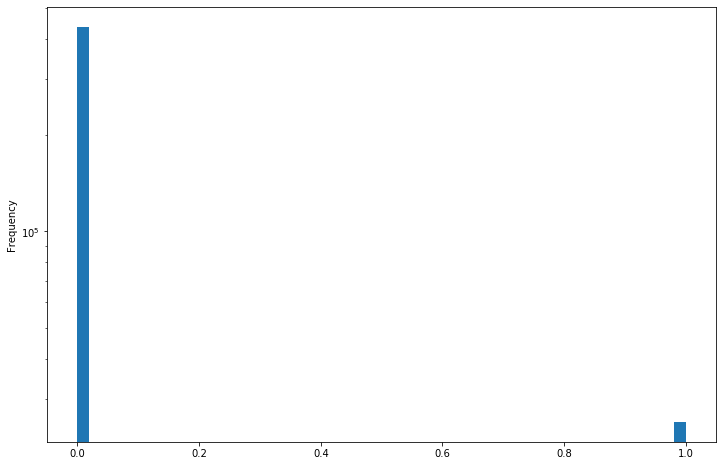

setor_INDUSTRIA


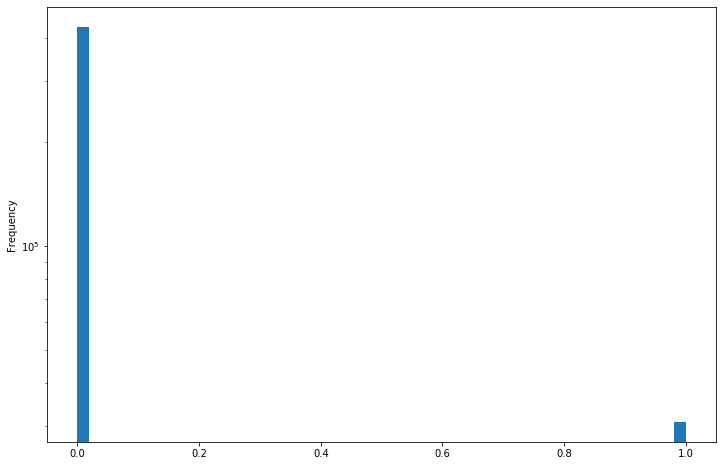

setor_OUTROS


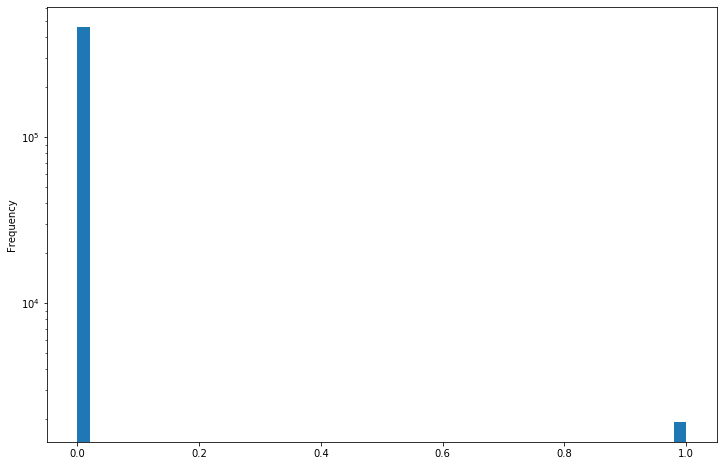

setor_SERVIÇO


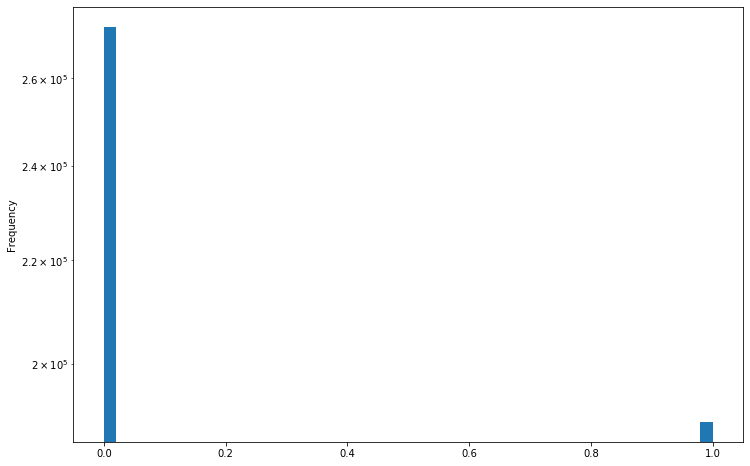

fl_optante_simples_-1


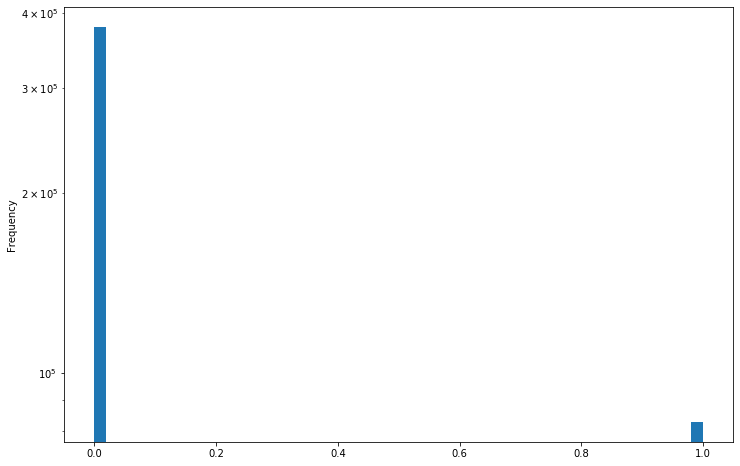

fl_optante_simples_False


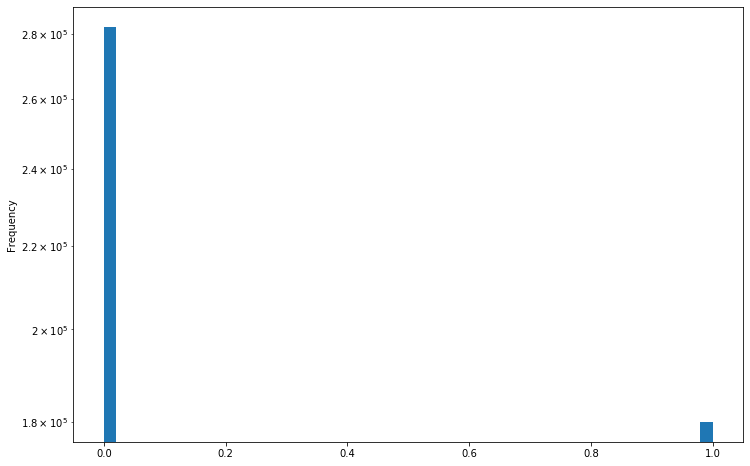

fl_optante_simples_True


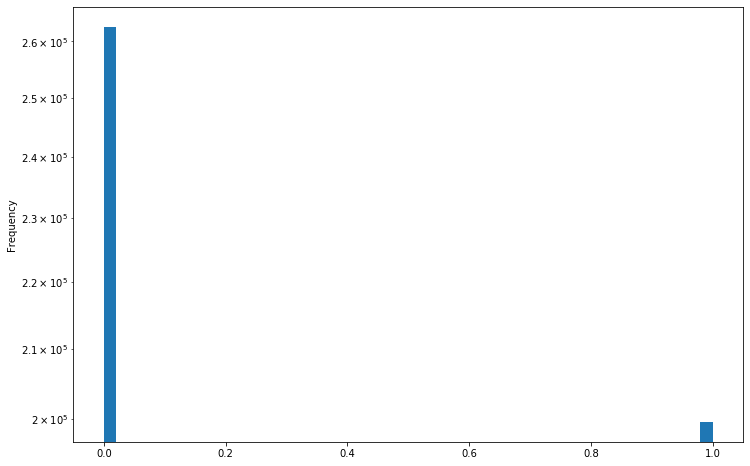

fl_optante_simei_-1


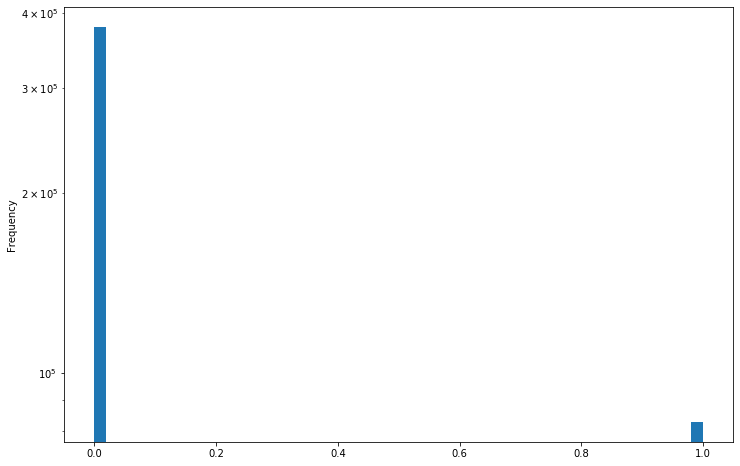

fl_optante_simei_False


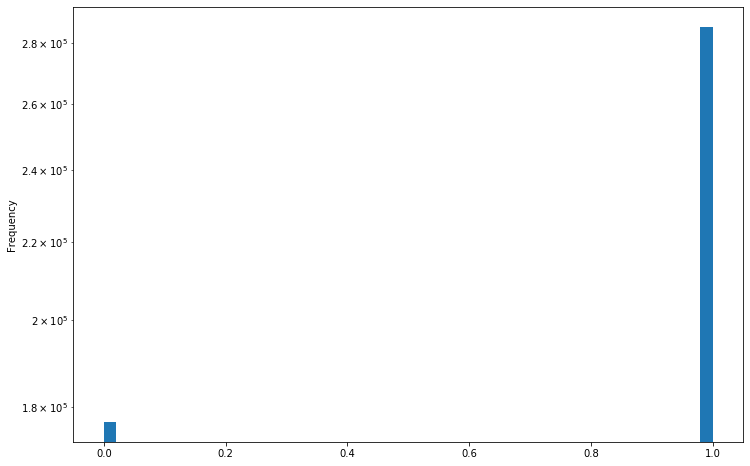

fl_optante_simei_True


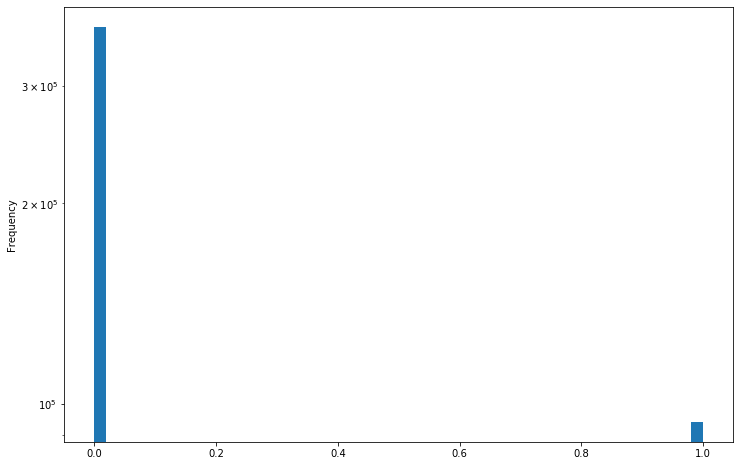

In [289]:
for feature in market.drop(columns=['id']):
    print(feature)
    market[feature].plot.hist(bins = 50, log= True)
    plt.show()

In [3]:
market.drop(columns=['fl_epp'],inplace=True)

In [6]:
import seaborn as sns

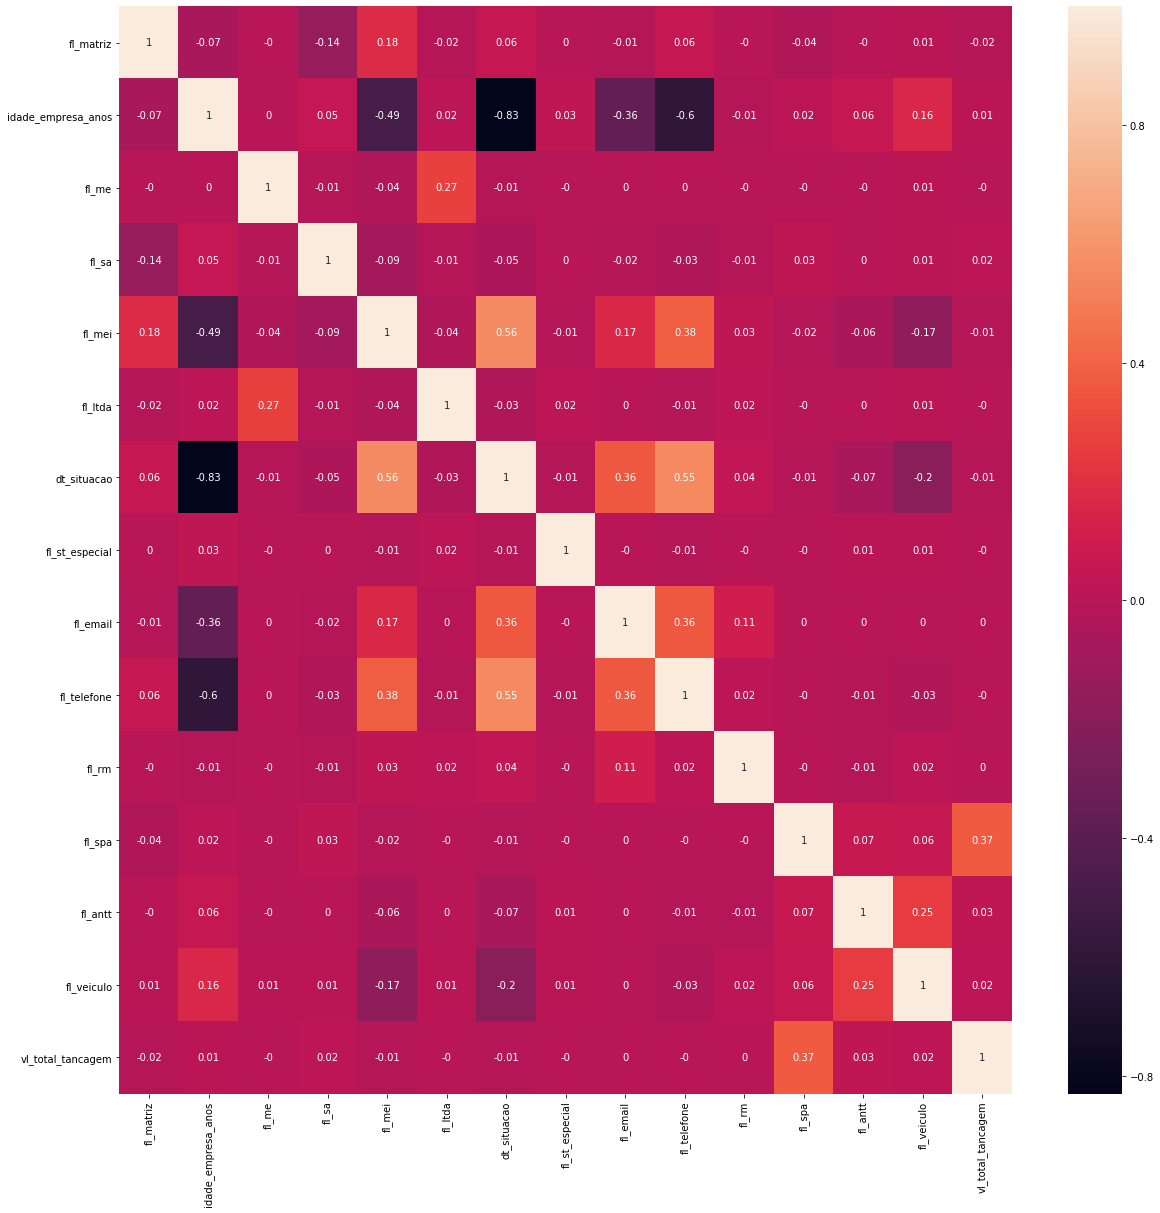

In [10]:
features = market.drop(columns=['id']).columns
plt.figure(figsize = (20,20))
sns.heatmap(market[features[0:15]].corr().round(2), annot= True);

In [ ]:
temp = market[features].corr().round(2)

In [ ]:
fl_optante_simei_False idade_empresa_anos 0.55
fl_mei fl_optante_simei_True 0.71
fl_telefone dt_situacao 0.55
vl_total_tancagem vl_potenc_cons_oleo_gas 0.94
vl_total_veiculos_leves vl_frota 0.53

In [40]:
temp[['fl_rm', 'fl_spa',  'fl_antt',
 'fl_veiculo',
 'vl_total_tancagem',
 'vl_total_veiculos_antt',
 'vl_total_veiculos_leves',
 'vl_total_veiculos_pesados',
 'qt_art',
 'vl_total_veiculos_pesados_grupo',
 'vl_total_veiculos_leves_grupo',
 'vl_total_tancagem_grupo',
 'vl_total_veiculos_antt_grupo',
 'vl_potenc_cons_oleo_gas',
 'sg_uf_matriz',
 'de_saude_tributaria',
 'nu_meses_rescencia',
 'de_nivel_atividade',
 'fl_simples_irregular',
 'vl_frota']].sort_values(by='vl_total_veiculos_leves', ascending=False).head(5)


fl_rm  fl_spa  fl_antt  fl_veiculo  \
vl_total_veiculos_leves       0.01    0.05     0.09        0.22   
vl_frota                      0.00    0.13     0.14        0.17   
vl_total_veiculos_pesados     0.01    0.26     0.24        0.17   
fl_veiculo                    0.02    0.06     0.25        1.00   
vl_faturamento_estimado_aux   0.01    0.03     0.01        0.05   

                             vl_total_tancagem  vl_total_veiculos_antt  \
vl_total_veiculos_leves                   0.03                    0.01   
vl_frota                                  0.04                    0.03   
vl_total_veiculos_pesados                 0.18                    0.09   
fl_veiculo                                0.02                    0.03   
vl_faturamento_estimado_aux               0.10                    0.00   

                             vl_total_veiculos_leves  \
vl_total_veiculos_leves                         1.00   
vl_frota                                        0.53   
vl_total_veiculos_pesados                       0.25   
fl_veiculo                                      0.22   
vl_faturamento_estimado_aux                     0.18   

                             vl_total_veiculos_pesados  qt_art  \
vl_total_veiculos_leves                           0.25    0.07   
vl_frota                                          0.40    0.04   
vl_total_veiculos_pesados                         1.00    0.06   
fl_veiculo                                        0.17    0.05   
vl_faturamento_estimado_aux                       0.11    0.07   

                             vl_total_veiculos_pesados_grupo  \
vl_total_veiculos_leves                                 0.02   
vl_frota                                                0.02   
vl_total_veiculos_pesados                               0.04   
fl_veiculo                                              0.01   
vl_faturamento_estimado_aux                             0.01   

                             vl_total_veiculos_leves_grupo  \
vl_total_veiculos_leves                               0.01   
vl_frota                                              0.00   
vl_total_veiculos_pesados                             0.00   
fl_veiculo                                           -0.01   
vl_faturamento_estimado_aux                           0.00   

                             vl_total_tancagem_grupo  \
vl_total_veiculos_leves                         0.01   
vl_frota                                        0.01   
vl_total_veiculos_pesados                       0.06   
fl_veiculo                                      0.01   
vl_faturamento_estimado_aux                     0.05   

                             vl_total_veiculos_antt_grupo  \
vl_total_veiculos_leves                              0.00   
vl_frota                                             0.01   
vl_total_veiculos_pesados                            0.02   
fl_veiculo                                           0.01   
vl_faturamento_estimado_aux                          0.00   

                             vl_potenc_cons_oleo_gas  sg_uf_matriz  \
vl_total_veiculos_leves                         0.05          0.00   
vl_frota                                        0.15          0.00   
vl_total_veiculos_pesados                       0.41          0.00   
fl_veiculo                                      0.06         -0.01   
vl_faturamento_estimado_aux                     0.10         -0.00   

                             de_saude_tributaria  nu_meses_rescencia  \
vl_total_veiculos_leves                    -0.01                0.01   
vl_frota                                   -0.01                0.01   
vl_total_veiculos_pesados                  -0.00                0.01   
fl_veiculo                                  0.00                0.07   
vl_faturamento_estimado_aux                 0.00                0.00   

                             de_nivel_atividade  fl_simples_irregular  \
vl_total_veiculos_leves                    0.05           

In [33]:
features.tolist(
    
)

['fl_matriz',
 'idade_empresa_anos',
 'fl_me',
 'fl_sa',
 'fl_mei',
 'fl_ltda',
 'dt_situacao',
 'fl_st_especial',
 'fl_email',
 'fl_telefone',
 'fl_rm',
 'fl_spa',
 'fl_antt',
 'fl_veiculo',
 'vl_total_tancagem',
 'vl_total_veiculos_antt',
 'vl_total_veiculos_leves',
 'vl_total_veiculos_pesados',
 'qt_art',
 'vl_total_veiculos_pesados_grupo',
 'vl_total_veiculos_leves_grupo',
 'vl_total_tancagem_grupo',
 'vl_total_veiculos_antt_grupo',
 'vl_potenc_cons_oleo_gas',
 'sg_uf_matriz',
 'de_saude_tributaria',
 'nu_meses_rescencia',
 'de_nivel_atividade',
 'fl_simples_irregular',
 'vl_frota',
 'empsetorcensitariofaixarendapopulacao',
 'fl_passivel_iss',
 'qt_socios',
 'qt_socios_pf',
 'qt_socios_pj',
 'idade_media_socios',
 'idade_maxima_socios',
 'idade_minima_socios',
 'qt_socios_st_regular',
 'qt_socios_st_suspensa',
 'qt_socios_masculino',
 'qt_socios_feminino',
 'qt_socios_pep',
 'qt_socios_pj_ativos',
 'qt_socios_pj_nulos',
 'qt_socios_pj_baixados',
 'qt_socios_pj_suspensos',
 'qt_soci